
## **Final Project**: Credit Score Classification Using Supervised Learning Tecniques

##### Name: José D. Soto Rivera
##### E-Mail: joso8155@colorado.edu
##### Course: CSCA 5622
##### Instructor: Geena Kim
##### Date: November 22, 2025


#### **Project Idea**

 This project focuses on building and comparing supervised machine learning models to classify individuals into credit score categories based on financial and demographic features. The task is a multi-class supervised learning classification problem, where the objective is to predict which credit bracket a person belongs to using historical credit-related information.


#### **Project Motivation**
 Understanding credit score behavior has real-world applications in consumer lending, fraud detection, financial risk modeling, and financial inclusion. The goal of this project is to build multiple models, evaluate their performance, and ultimately determine which classifier best predicts credit score categories in order to help creditors better assess their risk when using external factors to determine creditworthiness.

#### **Technical Description**
This project analyzes a large financial dataset and tests different machine learning models to classify individuals into credit score categories. The workflow includes data cleaning, preprocessing, exploratory data analysis (EDA), feature engineering, and training several classification models including Logistic Regression, Random Forest, XGBoost, LightGBM, SVM, and Decision Trees. The objective is to evaluate model performance, optimize hyperparameters, and determine which model provides the best predictive accuracy.

#### **Evaluation Metrics**
In evaluating the models, several accuracy parameters are used to measure performance across the multiple credit score classes. Accuracy represents the percentage of total predictions the model classifies correctly, but because the dataset may have class imbalance—some credit categories appearing more frequently than others—additional metrics are required for a fair assessment. Precision measures how often predicted credit labels are correct, recall measures how well the model identifies actual members of each credit category, and the F1-score provides a balanced harmonic mean of precision and recall. For deeper evaluation, confusion matrices reveal how often each model confuses one credit class for another, and macro/weighted averages help compare performance across unevenly distributed classes. When applicable, ROC curves and AUC scores provide insight into the model’s ability to distinguish between classes on a probability basis. Collectively, these accuracy parameters ensure a comprehensive evaluation of how well each machine learning model predicts credit score classifications.

#### **Dataset Citation**

This dataset is sourced from Kaggle’s online repository of publicly available datasets. The “Credit Score Classification” dataset was created by Rohan Paris and is distributed under the CC0 Public Domain license, meaning it is free to use, modify, and share without restriction. As a public-domain dataset, it contains no usage limitations and is intended to support research, education, and data science experimentation. The dataset includes credit-related and demographic information for individuals, allowing users to build machine learning models that classify credit score categories based on historical financial behavior.


**Paris, R. (2022)**. *Credit score classification* [Data set]. Kaggle. https://www.kaggle.com/datasets/parisrohan/credit-score-classification

**Link to Data**:https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data

## Table of Contents

#### Section 0 — Nuts and Bolts
- 0.a — Library Imports
- 0.b — Data Imports
- 0.c — Data Description

#### Section 1 — Data Parsing and Exploratory Data Analysis (EDA)
- 1.a — Data Description and Feature Types
- 1.b — Training Data Feature Visualization
- 1.c — Data Parsing
- 1.d - Data Grouping
- 1.e - Feature Relationship Analysis

#### Section 2 — Feature Engineering
- 2.a — Encoding Categorical Features
- 2.b — Scaling Numerical Features
- 2.c — Feature Construction 
- 2.d — Feature Selection

#### Section 3 — Model Building and Training
- 3.a — Baseline Model
- 3.b — Multiple Classifier Training
- 3.c — Hyperparameter Tuning
- 3.d — Handling Imbalanced Classes

#### Section 4 — Model Evaluation
- 4.0 - Test Data Feature Visualization + Cleaning
- 4.a — Evaluation Metrics
- 4.b — Confusion Matrices
- 4.c — Model Comparison Table
- 4.d — Feature Importance Analysis

#### Section 5 — Results and Discussion
- 5.a — Summary of Findings
- 5.b — Interpretation of Feature Effects
- 5.c — Challenges and Limitations
- 5.d — Future Improvements

#### Section 6 — Conclusion
- Summary of project insights and key takeaways.

#### Section 7 — Appendix
- Supplementary plots, logs, code snippets, and environment details.

## Section 0 - Nuts and Bolts

### Section 0a - Library Imports

In [117]:
# ============================================================
# Imports for Data Handling
# ============================================================
import pandas as pd            # Data loading, cleaning, manipulation
import numpy as np             # Numerical computations
import re
import pickle

# ============================================================
# Imports for Visualization & EDA
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Configure aesthetic settings for plots
sns.set(rc={'figure.figsize': (12, 6)})
sns.set_palette("Set2")


# ============================================================
# Imports for Preprocessing & Feature Engineering
# ============================================================
from sklearn.preprocessing import LabelEncoder       # Encode categorical labels
from sklearn.preprocessing import OneHotEncoder      # One-hot encoding for categorical variables
from sklearn.preprocessing import StandardScaler     # Standardize numerical features

from sklearn.impute import SimpleImputer            # Handle missing values
from sklearn.compose import ColumnTransformer        # Apply different preprocessors by column
from sklearn.pipeline import Pipeline                # Build end-to-end ML pipelines

from sklearn.model_selection import train_test_split # Split train/validation data
from sklearn.model_selection import GridSearchCV     # Hyperparameter tuning

from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer


# ============================================================
# Imports for Machine Learning Models
# ============================================================

# Baseline models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Gradient boosting libraries (high performance)
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier               # Excellent with categorical data

# Support Vector Machine
from sklearn.svm import SVC


# ============================================================
# Imports for Evaluating Model Performance
# ============================================================
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    f1_score
)


# ============================================================
# Imports for System & File Handling
# ============================================================
import os                      # Interacting with the operating system (checking file paths, directories)

# ============================================================
# End of Imports
# ============================================================

### Section 0.b - Data Imports and General Data Trends

In [118]:
# Section 0.b - Data Imports (Robust Version)

def load_csv_safe(path):
    if not os.path.exists(path):
        print(f"ERROR: File not found → {path}")
        return None
    
    try:
        df = pd.read_csv(path,low_memory=False)
        print(f"Loaded '{path}'  |  Shape: {df.shape}")
        return df
    except Exception as e:
        print(f"Failed to load '{path}': {e}")
        return None

train_df = load_csv_safe("train.csv")
test_df  = load_csv_safe("test.csv")

# ============================================================
# Initial Structural Overview (Sanity Checks)
# ============================================================
print("===== TRAIN DATASET OVERVIEW =====")
if train_df is not None:
    print("\nTrain dataset info:")
    display(train_df.info())
    print("\n")
    summary_train_df = pd.DataFrame({
    "Null Values": train_df.isnull().sum(),
    "Unique Values": train_df.nunique()
    })
    print("\n=== Test Dataset Overview ===")
    display(summary_train_df)
    print("\nTrain preview:")
    display(train_df.head())
    print("\n")

print("===== Test DATASET OVERVIEW =====")
if train_df is not None:
    print("\Test dataset info:")
    display(test_df.info())
    print("\n")
    summary_test_df = pd.DataFrame({
    "Null Values": test_df.isnull().sum(),
    "Unique Values": test_df.nunique()
    })
    print("\nSimple Data")
    display(summary_test_df)
    print("\nTest preview:")
    display(test_df.head())
    print("\n")

Loaded 'train.csv'  |  Shape: (100000, 28)
Loaded 'test.csv'  |  Shape: (50000, 27)
===== TRAIN DATASET OVERVIEW =====

Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate    

None




=== Test Dataset Overview ===


,Null Values,Unique Values
ID,0,100000
Customer_ID,0,12500
Month,0,8
Name,9985,10139
Age,0,1788
SSN,0,12501
Occupation,0,16
Annual_Income,0,18940
Monthly_Inhand_Salary,15002,13235
Num_Bank_Accounts,0,943



Train preview:


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good




===== Test DATASET OVERVIEW =====
\Test dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_

None




Simple Data


,Null Values,Unique Values
ID,0,50000
Customer_ID,0,12500
Month,0,4
Name,5015,10139
Age,0,976
SSN,0,12501
Occupation,0,16
Annual_Income,0,16121
Monthly_Inhand_Salary,7498,12793
Num_Bank_Accounts,0,540



Test preview:


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


## Section 1 - Data Parsing and Exploratory Data Analysis

### Section 1.a - Data Description and Feature Types

The dataset contains a mix of identifiers, demographic attributes, financial indicators, behavioral variables, and the target credit score label. Each column was assigned to either the categorical or numerical group based on its semantic meaning, structure, and modeling implications. 

Based on the Pandas Data Type object for categorical features, it seems like these are string types.


### **Categorical Features**

| Column Name               | Description                                                   | Pandas Data Type | Unique Values | Type          |
|---------------------------|---------------------------------------------------------------|------------------|---------------|---------------|
| ID                        | Unique identifier for each entry                              | object           | 100000        | Categorical   |
| Customer_ID               | Unique identifier for each customer                           | object           | 12500         | Categorical   |
| Month                     | Month of the year (missing sept-dec)                          | object           | 8             | Categorical   |
| Name                      | Name of the person                                            | object           | 10139         | Categorical   |
| SSN                       | Social Security Number                                        | object           | 12501         | Categorical   |
| Occupation                | Occupation of the person                                      | object           | 16            | Categorical   |
| Type_of_Loan              | Types of loans taken (multi-value string)                     | object           | 6260          | Categorical   |
| Credit_Mix                | Credit mix classification (e.g., Good, Bad, Standard)         | object           | 4             | Categorical   |
| Credit_History_Age        | Credit history duration (text format)                         | object           | 404           | Categorical   |
| Payment_of_Min_Amount     | Whether minimum amount was paid                               | object           | 3             | Categorical   |
| Payment_Behaviour         | Customer payment behavior classification                      | object           | 7             | Categorical   |
| Credit_Score              | Target variable: Poor / Standard / Good                       | object           | 3             | Categorical   |




### **Numerical Features**

| Column Name               | Description                                                   | Pandas Data Type | Unique Values | Type        |
|---------------------------|---------------------------------------------------------------|------------------|---------------|-------------|
| Age                       | Age of the person                                             | object           | 1788          | Numerical-like (dirty) |
| Annual_Income             | Annual income (USD)                                           | object           | 18940         | Numerical-like (dirty) |
| Monthly_Inhand_Salary     | Monthly salary (USD)                                          | float64          | 13235         | Numerical   |
| Num_Bank_Accounts         | Number of bank accounts                                       | int64            | 943           | Numerical   |
| Num_Credit_Card           | Number of credit cards                                        | int64            | 1179          | Numerical   |
| Interest_Rate             | Credit card interest rate                                     | int64            | 1750          | Numerical   |
| Num_of_Loan               | Number of loans taken                                         | object           | 434           | Numerical-like (dirty) |
| Delay_from_due_date       | Days delayed past due date                                    | int64            | 73            | Numerical   |
| Num_of_Delayed_Payment    | Number of delayed payments                                    | object           | 749           | Numerical-like (dirty) |
| Changed_Credit_Limit      | Percent change in credit limit                                | object           | 4384          | Numerical-like (dirty) |
| Num_Credit_Inquiries      | Number of credit inquiries                                    | float64          | 1223          | Numerical   |
| Outstanding_Debt          | Total remaining debt (USD)                                    | object           | 13178         | Numerical-like (dirty) |
| Credit_Utilization_Ratio  | Credit utilization ratio                                      | float64          | 100000        | Numerical   |
| Total_EMI_per_month       | Monthly EMI payments (USD)                                    | float64          | 14950         | Numerical   |
| Amount_invested_monthly   | Monthly amount invested (USD)                                 | object           | 91049         | Numerical-like (dirty) |
| Monthly_Balance           | Monthly balance (USD)                                         | object           | 98792         | Numerical-like (dirty) |

### Section 1.b - Training Data Feature Visualization + Parsing
#### Categorical Data

In [119]:
categorical_cols = [
    "ID", "Customer_ID", "Month", "Name", "SSN", "Occupation",
    "Type_of_Loan", "Credit_Mix", "Credit_History_Age",
    "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Score"
]

numeric_cols = [
    "Age", "Annual_Income", "Monthly_Inhand_Salary",
    "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate",
    "Num_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment",
    "Changed_Credit_Limit", "Num_Credit_Inquiries",
    "Outstanding_Debt", "Credit_Utilization_Ratio",
    "Total_EMI_per_month", "Amount_invested_monthly",
    "Monthly_Balance"
]

=== Training Set CATEGORICAL FEATURE VISUALIZATION ===


--- Most Common Values in 'ID' ---



ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
0x19ca3    1
0x19ca2    1
0x19ca1    1
0x19ca0    1
0x19c9f    1
Name: count, dtype: int64

(Skipping bar plot for 'ID' — too many unique values)


--- Most Common Values in 'Customer_ID' ---



Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
CUS_0xc67b    8
CUS_0x8a64    8
CUS_0x35ea    8
CUS_0x5044    8
CUS_0x9dfd    8
Name: count, dtype: int64

(Skipping bar plot for 'Customer_ID' — too many unique values)


--- Most Common Values in 'Month' ---



Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

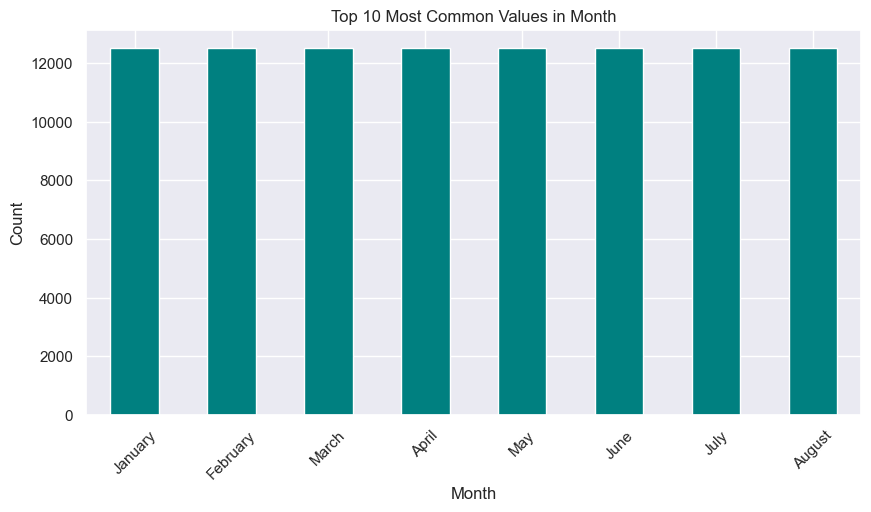


--- Most Common Values in 'Name' ---



Name
Langep                44
Stevex                44
Vaughanl              39
Jessicad              39
Raymondr              38
Danielz               38
Deepa Seetharamanm    38
Jessica Wohlt         38
Nate Raymondw         37
Nicko                 37
Name: count, dtype: int64

(Skipping bar plot for 'Name' — too many unique values)


--- Most Common Values in 'SSN' ---



SSN
#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
376-28-6303       8
194-93-5515       8
442-30-8588       8
362-78-8068       8
221-76-9774       8
Name: count, dtype: int64

(Skipping bar plot for 'SSN' — too many unique values)


--- Most Common Values in 'Occupation' ---



Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Name: count, dtype: int64

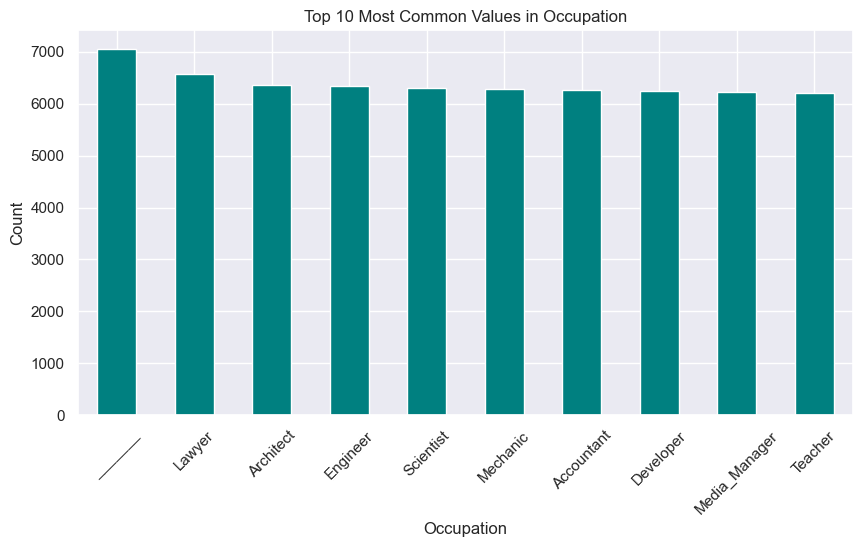


--- Most Common Values in 'Type_of_Loan' ---



Type_of_Loan
Not Specified                      1408
Credit-Builder Loan                1280
Personal Loan                      1272
Debt Consolidation Loan            1264
Student Loan                       1240
Payday Loan                        1200
Mortgage Loan                      1176
Auto Loan                          1152
Home Equity Loan                   1136
Personal Loan, and Student Loan     320
Name: count, dtype: int64

(Skipping bar plot for 'Type_of_Loan' — too many unique values)


--- Most Common Values in 'Credit_Mix' ---



Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

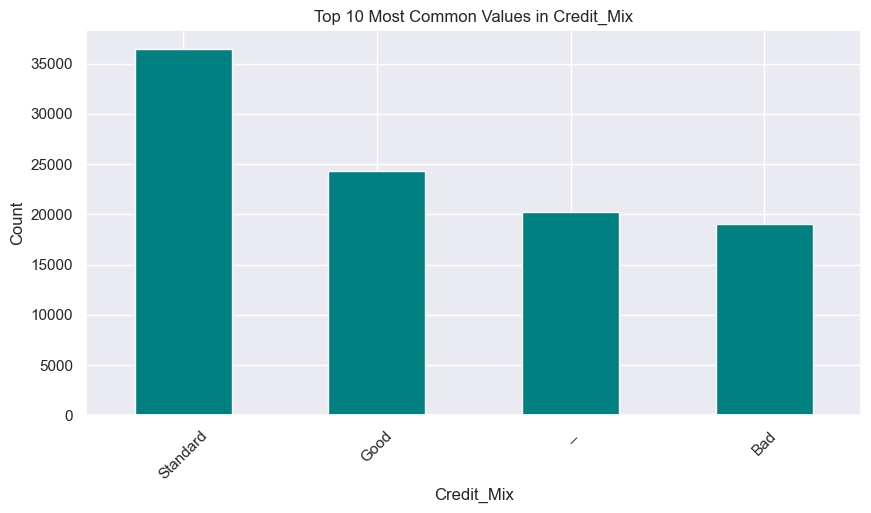


--- Most Common Values in 'Credit_History_Age' ---



Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
17 Years and 9 Months     438
15 Years and 10 Months    436
17 Years and 10 Months    435
15 Years and 9 Months     432
18 Years and 3 Months     428
Name: count, dtype: int64

(Skipping bar plot for 'Credit_History_Age' — too many unique values)


--- Most Common Values in 'Payment_of_Min_Amount' ---



Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

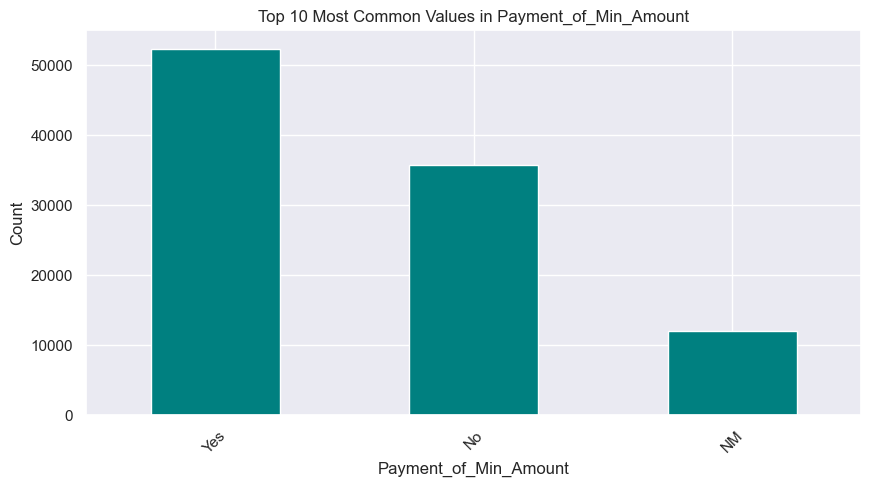


--- Most Common Values in 'Payment_Behaviour' ---



Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

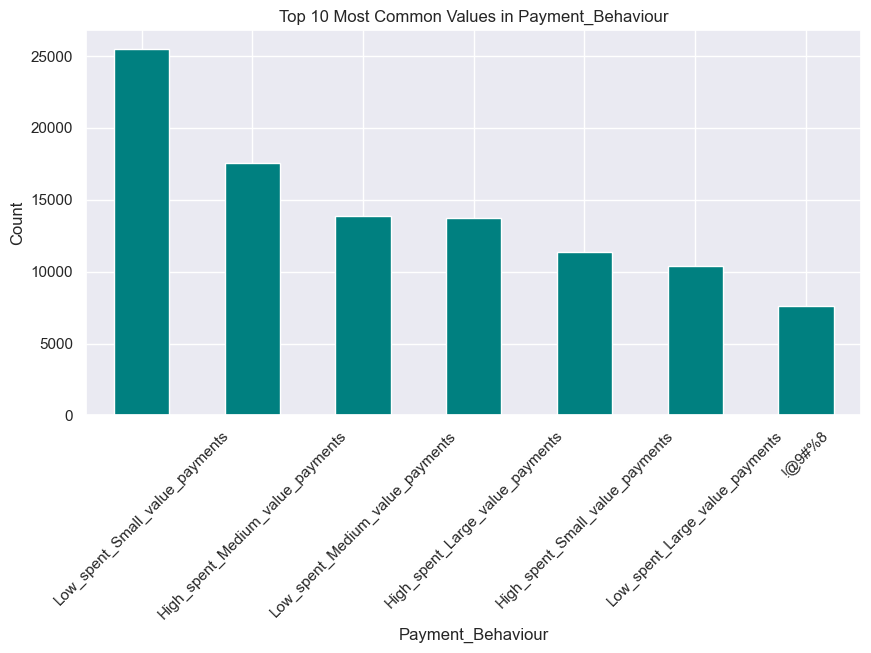


--- Most Common Values in 'Credit_Score' ---



Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

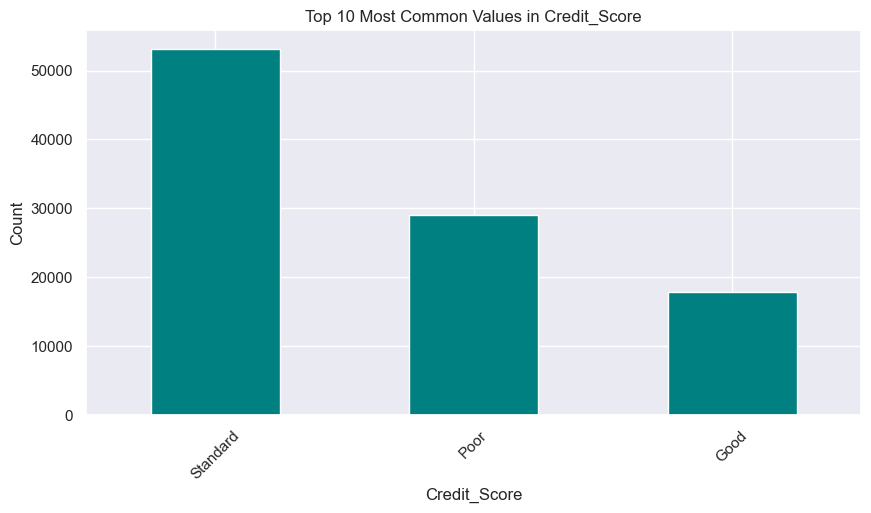

In [120]:
print("=== Training Set CATEGORICAL FEATURE VISUALIZATION ===\n")

for col in categorical_cols:
    print(f"\n--- Most Common Values in '{col}' ---\n")
    display(train_df[col].value_counts().head(10))
    
    # Skip plotting extremely high-cardinality columns to avoid unreadable charts
    if train_df[col].nunique() > 50:
        print(f"(Skipping bar plot for '{col}' — too many unique values)\n")
        continue
    
    plt.figure(figsize=(10, 5))
    train_df[col].value_counts().head(10).plot(kind='bar', color='teal')
    plt.title(f"Top 10 Most Common Values in {col}")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

**Inconsistent or Invalid Training Categorical Feature Values Requiring Cleaning**

| Feature Name             | Problematic Value(s)        | Frequency | Notes / Interpretation                             |
|--------------------------|-----------------------------|-----------|-----------------------------------------------------|
| Payment_Behaviour        | `!@9#%8`                    | 7,600     | Clearly invalid; likely a placeholder or corruption |
| Payment_of_Min_Amount    | `NM`                        | 12,007    | Likely means **Not Mentioned** (ambiguous/missing)  |
| Credit_Mix               | `_`                         | 20,195    | Missing or placeholder category                     |
| Occupation               | `__________`                | 7,062     | Placeholder for missing occupation                  |
| Type_of_Loan             | `Not Specified`             | —         | Could be relevant information, not necessarily null     |
| SSN                      | `#F%$D@*&8`                 | 5,572     | Corrupted SSN placeholder; treat as missing value   |

In [121]:
invalid_categorical_values = {
    "Payment_Behaviour": ["!@9#%8"],
    "Payment_of_Min_Amount": ["NM"],
    "Credit_Mix": ["_"],
    "Occupation": ["__________"],
    "SSN": ["#F%$D@*&8"]
    # Type_of_Loan NOT included because "Not Specified" is useful, not corruption
}

#same for test data: 
def drop_invalid_categorical_rows(df, invalid_dict):
    rows_to_drop = pd.Series(False, index=df.index)

    for col, bad_values in invalid_dict.items():
        if col in df.columns:
            rows_to_drop |= df[col].isin(bad_values)

    cleaned_df = df[~rows_to_drop].reset_index(drop=True)
    
    print(f"Rows dropped from dataset: {rows_to_drop.sum():,}")
    print(f"New shape: {cleaned_df.shape}")
    
    return cleaned_df

train_df = drop_invalid_categorical_rows(train_df, invalid_categorical_values)

Rows dropped from dataset: 38,820
New shape: (61180, 28)


Several categorical features should be removed because they add noise rather than predictive value. **ID**, **Customer_ID**, **Name**, and **SSN** are purely identifiers with extremely high cardinality, offering no meaningful signal and risking overfitting. Additionally, **Type_of_Loan** and **Credit_History_Age** should not be used in their raw form: **Type_of_Loan** contains thousands of inconsistent multi-value strings that cannot be directly encoded, and **Credit_History_Age** is stored as text (e.g., “12 Years 4 Months”), making it unusable until converted into a numeric duration. For these reasons, only properly cleaned and transformed versions of these fields should be retained for modeling.

After this we update categorical and numerical columns variable to ensure that credit_history_month is considered a numerical feature.

In [122]:

# ============================================================
# REMOVE HIGH-CARDINALITY, NON-PREDICTIVE IDENTIFIERS
# ============================================================

cols_to_drop = ["ID", "Customer_ID", "Name", "SSN"]

for col in cols_to_drop:
    if col in train_df.columns:
        train_df = train_df.drop(columns=[col])

print(f"Dropped columns from train_df: {cols_to_drop}")


Dropped columns from train_df: ['ID', 'Customer_ID', 'Name', 'SSN']


In [123]:
# ============================================================
# TRANSFORM 'Credit_History_Age' → numeric months
# ============================================================

# -----------------------------
# Robust parser for text-based credit history
# -----------------------------
def parse_credit_history(text):
    if pd.isna(text):
        return np.nan

    text = str(text).lower()

    # Extract number before "year" (covers "year", "years", "yr", "yrs")
    years = re.search(r"(\d+)\s*(year|yr)", text)
    years = int(years.group(1)) if years else 0

    # Extract number before "month" (covers "month", "months", "mo", "mos")
    months = re.search(r"(\d+)\s*(month|mo)", text)
    months = int(months.group(1)) if months else 0

    # If nothing valid was found → treat as missing
    if years == 0 and months == 0:
        return np.nan

    return years * 12 + months


# -----------------------------
# Apply parser to train_df
# -----------------------------
train_df["Credit_History_Months"] = train_df["Credit_History_Age"].apply(parse_credit_history)



# -----------------------------
# Remove rows with NaN values (unparseable values)
# -----------------------------
before = len(train_df)
train_df = train_df.dropna(subset=["Credit_History_Months"]).reset_index(drop=True)
after = len(train_df)

print(f"Removed rows with invalid credit history: {before - after}")
print(f"Remaining rows: {after}")

# Optional: drop original text column
train_df = train_df.drop(columns=["Credit_History_Age"])
print("Dropped original 'Credit_History_Age' column.")
print("Added 'Credit_History_Months' column.")

Removed rows with invalid credit history: 5496
Remaining rows: 55684
Dropped original 'Credit_History_Age' column.
Added 'Credit_History_Months' column.


In [124]:
# ============================================================
# TRANSFORM 'Type_of_Loan' (multi-value strings)
# ============================================================

def count_loan_types(entry):
    """Counts how many loan types appear in the string."""
    if pd.isna(entry):
        return 0
    return len(str(entry).split(","))

if "Type_of_Loan" in train_df.columns:
    train_df["Num_Loan_Types"] = train_df["Type_of_Loan"].apply(count_loan_types)

    common_loans = [
        "Auto Loan",
        "Credit-Builder Loan",
        "Personal Loan",
        "Home Loan",
        "Mortgage Loan",
        "Student Loan"
    ]

    for loan in common_loans:
        clean_name = loan.replace(" ", "_").replace("-", "_")
        train_df[f"Has_{clean_name}"] = train_df["Type_of_Loan"].str.contains(loan, na=False).astype(int)

    train_df = train_df.drop(columns=["Type_of_Loan"])
    print("Transformed and removed 'Type_of_Loan' from train_df.")

print("\n✔ Transformations applied to train_df successfully.")
print("Current train_df columns:", list(train_df.columns))

Transformed and removed 'Type_of_Loan' from train_df.

✔ Transformations applied to train_df successfully.
Current train_df columns: ['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score', 'Credit_History_Months', 'Num_Loan_Types', 'Has_Auto_Loan', 'Has_Credit_Builder_Loan', 'Has_Personal_Loan', 'Has_Home_Loan', 'Has_Mortgage_Loan', 'Has_Student_Loan']


In [125]:
# ============================================================
# UPDATE CATEGORICAL & NUMERICAL COLUMN LISTS AFTER TRANSFORMATIONS
# ============================================================

# ----------- CATEGORICAL FEATURES -----------
categorical_cols = [
    "Month",
    "Occupation",
    "Credit_Mix",
    "Payment_of_Min_Amount",
    "Payment_Behaviour",
    "Credit_Score",
    "Has_Auto_Loan",
    "Has_Credit_Builder_Loan",
    "Has_Personal_Loan",
    "Has_Home_Loan",
    "Has_Mortgage_Loan",
    "Has_Student_Loan"
]


# ----------- NUMERICAL FEATURES -----------
numeric_cols = [
    "Age",
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Interest_Rate",
    "Num_of_Loan",
    "Delay_from_due_date",
    "Num_of_Delayed_Payment",
    "Changed_Credit_Limit",
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Utilization_Ratio",
    "Total_EMI_per_month",
    "Amount_invested_monthly",
    "Monthly_Balance",
    "Credit_History_Months",  # <-- NEW numeric feature
    "Num_Loan_Types"          # <-- engineered numeric feature
]


#### Numerical Features

Several columns that should contain numeric values are stored as object dtype because the raw dataset includes corrupted entries, placeholder symbols, or inconsistent formatting. Columns such as Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, and Amount_invested_monthly appear numeric but behave like text, resulting in incorrect summaries and blocking statistical operations. To fix this, all non-numeric placeholders (e.g., "_", "__10000__", " ", "Not Available") must be replaced with NaN, and then the columns can be safely converted using pd.to_numeric(..., errors="coerce"). This ensures the data is interpreted as integers or floats, enables proper descriptive statistics, and prepares the features for machine learning algorithms that require clean numerical inputs.

In [126]:
print("\n=== NUMERIC FEATURE STATISTICS ===\n")

train_df[numeric_cols].describe()


=== NUMERIC FEATURE STATISTICS ===



,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_History_Months,Num_Loan_Types
count,47422.000000,55684.000000,55684.000000,55684.000000,55684.000000,54581.000000,55684.000000,55684.000000,55684.000000,55684.000000
mean,4198.894944,17.306120,22.331100,74.653832,21.091840,27.219564,32.282701,1387.003008,220.830041,3.541269
std,3189.228283,119.290504,128.740918,477.835744,14.907944,190.005017,5.114820,8221.866267,99.437754,2.441199
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.100770,0.000000,1.000000,0.000000
25%,1622.308437,3.000000,4.000000,8.000000,10.000000,3.000000,28.046219,30.506517,145.000000,2.000000
50%,3097.025000,6.000000,5.000000,13.000000,18.000000,6.000000,32.289714,69.412940,219.000000,3.000000
75%,5991.852500,7.000000,7.000000,20.000000,28.000000,9.000000,36.502660,161.978219,301.000000,5.000000
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2594.000000,50.000000,82256.000000,404.000000,9.000000


### **Numerical Feature Cleaning Recommendations**

| Column Name               | Detected Problems                                                              | Recommended Fix                                                                 |
|---------------------------|--------------------------------------------------------------------------------|----------------------------------------------------------------------------------|
| **Age**                   | Values range from -500 to 8698 (impossible ages), extreme outliers            | Cap to [18, 100]; replace invalid entries with NaN                               |
| **Annual_Income**         | Extremely large upper values (24M), noisy variance                             | Winsorize at 99th percentile or cap at realistic max (e.g., 500k)               |
| **Monthly_Inhand_Salary** | Some mismatches with Annual_Income; normal range but skewed                   | Recalculate if > Annual_Income/2; otherwise keep                                 |
| **Num_Bank_Accounts**     | Minimum = -1 (invalid), max = 1798 (impossible)                                | Replace negatives with NaN; cap above 15                                         |
| **Num_Credit_Card**       | Max = 1499 (impossible)                                                         | Cap above 15                                                                     |
| **Interest_Rate**         | Max = 5797% (impossible)                                                       | Cap at 35%                                                                       |
| **Num_of_Loan**           | Negative values (min = -100), max = 1485 (impossible)                          | Replace negatives with NaN; cap above 10                                         |
| **Delay_from_due_date**   | Negative values (min = -5) represent prepayments (valid)                       | **Keep negatives**; cap upper bound at 60                                        |
| **Num_of_Delayed_Payment**| Negative values; max = 4397 (impossible)                                       | Replace negatives with NaN; cap above 50                                         |
| **Changed_Credit_Limit**  | Very wide variance; some corrupted values previously present                   | Winsorize at 1–99%                                                               |
| **Num_Credit_Inquiries**  | Values up to 2594 (impossible)                                                 | Cap above 30                                                                     |
| **Outstanding_Debt**      | Extreme outliers (mean vs max mismatch), right-skewed                         | Winsorize at 1–99% or log-transform                                              |
| **Credit_Utilization_Ratio** | Mostly clean, bounded [20–50%] but should be [0–100]                         | Cap to [0, 100]; no major cleaning needed                                        |
| **Total_EMI_per_month**   | Max = 82,256 (unrealistic)                                                     | Cap above 5,000; consider log-transform                                          |
| **Amount_invested_monthly** | Very large range; outliers; previously contained underscore corruption       | Log-transform; Winsorize at 99%                                                  |
| **Credit_History_Months** | Clean; consistent range (1–404)                                                | No cleaning needed                                                                |
| **Num_Loan_Types**        | Clean engineered feature (0–9)                                                 | No cleaning needed                                                                |

In [127]:
print("\n=== STEP 1: CLEAN UNDERSCORES FROM NUMERIC COLUMNS ===\n")

def clean_numeric_value(x):
    """Remove underscores and convert to numeric if possible."""
    if pd.isna(x):
        return np.nan

    s = str(x).strip()

    # Remove all underscores anywhere in the string
    s = s.replace("_", "")

    # Try to convert to float
    try:
        return float(s)
    except:
        return np.nan


for col in numeric_cols:
    before_na = train_df[col].isna().sum()

    train_df[col] = train_df[col].apply(clean_numeric_value)

    after_na = train_df[col].isna().sum()
    print(f"{col}: cleaned underscores → {after_na - before_na} new NaN values")

print("\n✔ Underscore cleaning complete!\n")

print("\n=== STEP 2: DROP REMAINING INVALID NUMERIC ROWS ===\n")

before = len(train_df)
train_df = train_df.dropna(subset=numeric_cols).reset_index(drop=True)
after = len(train_df)

print(f"Rows removed: {before - after}")
print(f"Remaining rows: {after}")


=== STEP 1: CLEAN UNDERSCORES FROM NUMERIC COLUMNS ===

Age: cleaned underscores → 0 new NaN values
Annual_Income: cleaned underscores → 0 new NaN values
Monthly_Inhand_Salary: cleaned underscores → 0 new NaN values
Num_Bank_Accounts: cleaned underscores → 0 new NaN values
Num_Credit_Card: cleaned underscores → 0 new NaN values
Interest_Rate: cleaned underscores → 0 new NaN values
Num_of_Loan: cleaned underscores → 0 new NaN values
Delay_from_due_date: cleaned underscores → 0 new NaN values
Num_of_Delayed_Payment: cleaned underscores → 0 new NaN values
Changed_Credit_Limit: cleaned underscores → 1176 new NaN values
Num_Credit_Inquiries: cleaned underscores → 0 new NaN values
Outstanding_Debt: cleaned underscores → 0 new NaN values
Credit_Utilization_Ratio: cleaned underscores → 0 new NaN values
Total_EMI_per_month: cleaned underscores → 0 new NaN values
Amount_invested_monthly: cleaned underscores → 0 new NaN values
Monthly_Balance: cleaned underscores → 0 new NaN values
Credit_Histor

In [128]:

print("\n=== APPLYING CLEANING RULES TO NUMERIC COLUMNS ===\n")

# --- Helper functions --------------------------------------------------

def cap_range(col, min_val=None, max_val=None):
    """Cap values to a fixed range."""
    if min_val is not None:
        train_df.loc[train_df[col] < min_val, col] = np.nan
    if max_val is not None:
        train_df.loc[train_df[col] > max_val, col] = np.nan

def cap_upper(col, max_val):
    """Cap only upper bound; leave lower bound intact."""
    train_df.loc[train_df[col] > max_val, col] = np.nan

def winsorize(col, lower_q=0.01, upper_q=0.99):
    """Winsorize values at quantiles."""
    low = train_df[col].quantile(lower_q)
    high = train_df[col].quantile(upper_q)
    train_df.loc[train_df[col] < low, col] = low
    train_df.loc[train_df[col] > high, col] = high

# ----------------------------------------------------------------------
# APPLY CLEANING RULES
# ----------------------------------------------------------------------

# Age → must be 18–100
cap_range("Age", 18, 100)

# Annual Income → cap > 500k
cap_upper("Annual_Income", 500_000)

# Monthly_Inhand_Salary → if > Annual_Income/2 → recompute, else keep
train_df.loc[
    train_df["Monthly_Inhand_Salary"] > train_df["Annual_Income"] / 2,
    "Monthly_Inhand_Salary"
] = train_df["Annual_Income"] / 12

# Num_Bank_Accounts → negative = NaN, cap above 15
train_df.loc[train_df["Num_Bank_Accounts"] < 0, "Num_Bank_Accounts"] = np.nan
cap_upper("Num_Bank_Accounts", 15)

# Num_Credit_Card → cap above 15
cap_upper("Num_Credit_Card", 15)

# Interest Rate → cap at 35%
cap_upper("Interest_Rate", 35)

# Num_of_Loan → negative = NaN, cap > 10
train_df.loc[train_df["Num_of_Loan"] < 0, "Num_of_Loan"] = np.nan
cap_upper("Num_of_Loan", 10)

# Delay_from_due_date → keep negatives, cap upper bound at 60
cap_upper("Delay_from_due_date", 60)

# Num_of_Delayed_Payment → negative invalid, cap > 50
train_df.loc[train_df["Num_of_Delayed_Payment"] < 0, "Num_of_Delayed_Payment"] = np.nan
cap_upper("Num_of_Delayed_Payment", 50)

# Changed_Credit_Limit → winsorize 1–99%
winsorize("Changed_Credit_Limit")

# Num_Credit_Inquiries → cap above 30
cap_upper("Num_Credit_Inquiries", 30)

# Outstanding_Debt → winsorize 1–99%
winsorize("Outstanding_Debt")

# Credit Utilization Ratio → cap to [0, 100]
cap_range("Credit_Utilization_Ratio", 0, 100)

# Total_EMI_per_month → cap above 5000
cap_upper("Total_EMI_per_month", 5000)

# Amount_invested_monthly → winsorize at 99%, then log-transform
winsorize("Amount_invested_monthly", 0.01, 0.99)
train_df["Amount_invested_monthly"] = np.log1p(train_df["Amount_invested_monthly"])

# Credit_History_Months → no cleaning needed
# Num_Loan_Types → no cleaning needed

# ----------------------------------------------------------------------
# FINAL STEP: REMOVE ANY ROW WITH NUMERIC NAN VALUES
# ----------------------------------------------------------------------

before = len(train_df)
train_df = train_df.dropna(subset=numeric_cols).reset_index(drop=True)
after = len(train_df)

print(f"Rows removed due to invalid numeric values: {before - after}")
print(f"Remaining rows after cleaning: {after}")
print("\n=== CLEANING COMPLETE ===")


=== APPLYING CLEANING RULES TO NUMERIC COLUMNS ===

Rows removed due to invalid numeric values: 9718
Remaining rows after cleaning: 30252

=== CLEANING COMPLETE ===


### Section 1.c - Feature Relationship Analysis

In this section, we examine how features relate to one another and to the target variable (`Credit_Score`).  
Understanding these relationships helps identify:

- Redundant or highly correlated numerical features  
- Features with little to no predictive signal  
- Which variables may influence or predict credit score  
- Potential multicollinearity problems  
- Early insights into how demographic and financial indicators interact  

We analyze relationships using:

1. A full numerical correlation matrix  
2. A heatmap visualization  
3. A filtered table showing only strong correlations  
4. Categorical feature relationships with the target variable


In [129]:
print("\n=== NUMERICAL FEATURE CORRELATION MATRIX ===\n")

num_corr = train_df[numeric_cols].corr(method="pearson")
display(num_corr)


=== NUMERICAL FEATURE CORRELATION MATRIX ===



,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Months,Num_Loan_Types
Age,1.000000,0.058535,0.058215,-0.148573,-0.115397,-0.170363,-0.159913,-0.135950,-0.134800,-0.126475,-0.187595,-0.161600,0.017572,-0.021891,0.019513,-0.012516,0.180945,-0.159913
Annual_Income,0.058535,1.000000,0.984456,-0.267706,-0.216409,-0.295949,-0.253624,-0.238858,-0.273584,-0.172089,-0.275084,-0.263835,0.175665,0.312560,0.416658,0.004312,0.265944,-0.253624
Monthly_Inhand_Salary,0.058215,0.984456,1.000000,-0.271378,-0.217750,-0.298888,-0.257257,-0.243726,-0.277175,-0.176003,-0.278492,-0.268965,0.179737,0.304527,0.421904,0.004220,0.271080,-0.257257
Num_Bank_Accounts,-0.148573,-0.267706,-0.271378,1.000000,0.434628,0.576331,0.455840,0.553916,0.592282,0.337727,0.509220,0.497697,-0.062923,0.034175,-0.132860,0.010317,-0.469311,0.455840
Num_Credit_Card,-0.115397,-0.216409,-0.217750,0.434628,1.000000,0.490011,0.414879,0.473734,0.415973,0.261394,0.456330,0.486111,-0.052354,0.035323,-0.105927,0.001880,-0.412263,0.414879
Interest_Rate,-0.170363,-0.295949,-0.298888,0.576331,0.490011,1.000000,0.550882,0.579135,0.563190,0.377048,0.629896,0.626601,-0.071237,0.041490,-0.142422,0.004805,-0.574513,0.550882
Num_of_Loan,-0.159913,-0.253624,-0.257257,0.455840,0.414879,0.550882,1.000000,0.489962,0.455609,0.377267,0.557218,0.633156,-0.094071,0.238591,-0.135891,0.004781,-0.596470,1.000000
Delay_from_due_date,-0.135950,-0.238858,-0.243726,0.553916,0.473734,0.579135,0.489962,1.000000,0.540471,0.310281,0.531627,0.570445,-0.060804,0.054568,-0.112490,0.004462,-0.483716,0.489962
Num_of_Delayed_Payment,-0.134800,-0.273584,-0.277175,0.592282,0.415973,0.563190,0.455609,0.540471,1.000000,0.332955,0.484811,0.493024,-0.066951,0.031923,-0.135830,0.015250,-0.468181,0.455609
Changed_Credit_Limit,-0.126475,-0.172089,-0.176003,0.337727,0.261394,0.377048,0.377267,0.310281,0.332955,1.000000,0.388025,0.461530,-0.046444,0.044874,-0.087650,0.005218,-0.426292,0.377267


The correlation analysis reveals several strong relationships among financial behavior variables. Income-related features—Annual_Income, Monthly_Inhand_Salary, and Amount_invested_monthly—show very strong positive correlations with one another, indicating they capture similar underlying financial capacity. Credit behavior metrics such as Interest_Rate, Num_Credit_Inquiries, Outstanding_Debt, Num_of_Loan, and Num_of_Delayed_Payment form a tightly connected cluster, all showing strong positive correlations, suggesting that borrowers with heavier credit usage tend to exhibit multiple risk-related signals simultaneously. In contrast, Credit_Utilization_Ratio shows minimal correlation with most features, indicating it behaves independently. Credit_History_Months is strongly negatively correlated with high-risk indicators such as Interest_Rate, Num_Credit_Inquiries, and Outstanding_Debt, implying that longer credit histories are associated with lower risk profiles. Overall, the matrix highlights clear clusters of income-related variables and risk-related variables, with age contributing weak or moderate negative correlations across most credit activity features.

Below is a heatmap version of the above table.

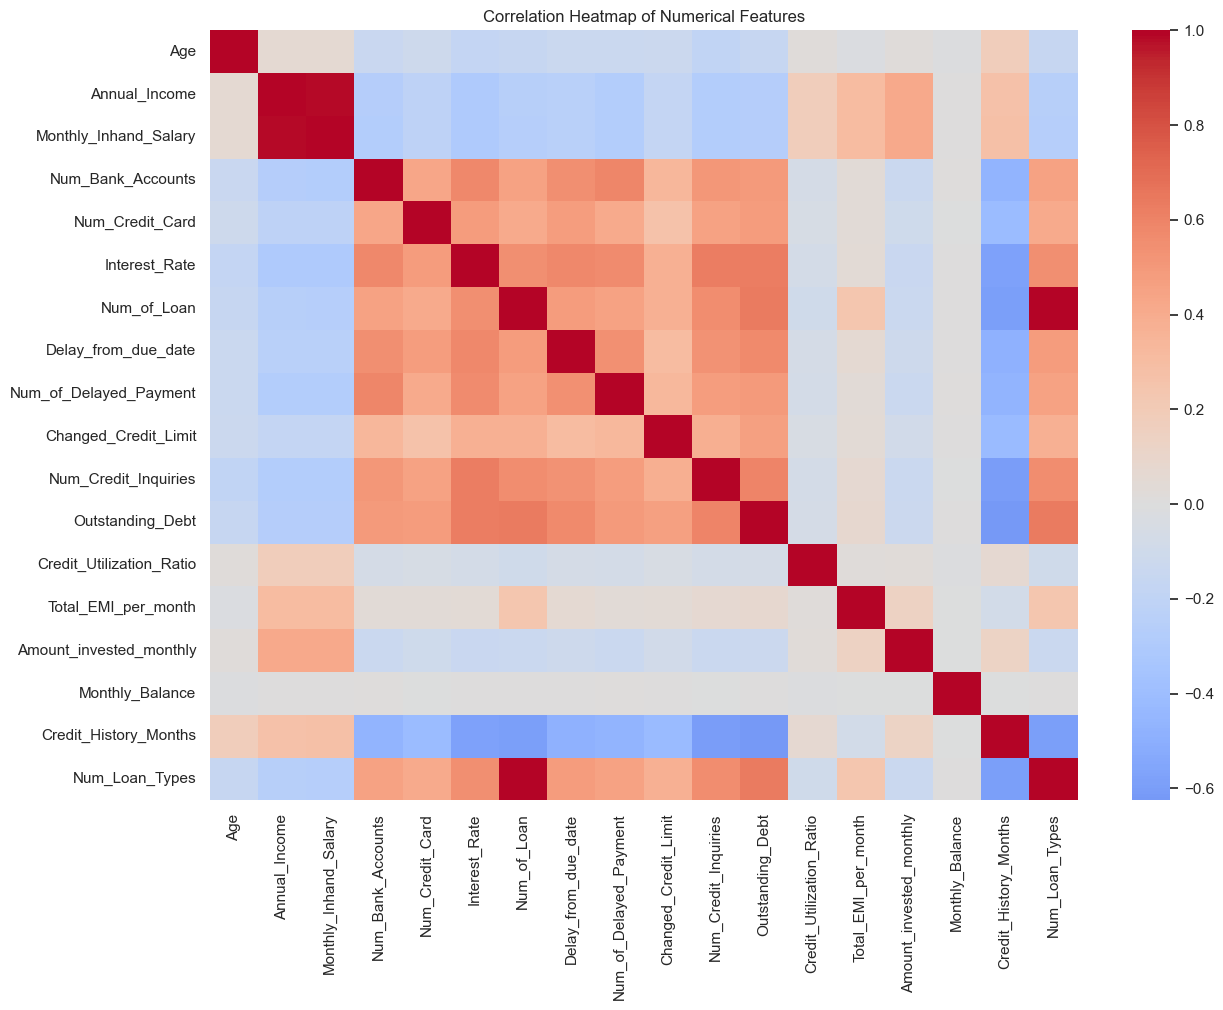

In [130]:
plt.figure(figsize=(14, 10))
sns.heatmap(num_corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [131]:
print("\n=== STRONG CORRELATIONS (|corr| ≥ 0.30) ===\n")

strong_corr = num_corr.abs().unstack().sort_values(ascending=False)

# Remove duplicates (pairs appear twice) and self-correlations
strong_corr = strong_corr[strong_corr < 0.9999]

# Filter threshold
strong_corr = strong_corr[strong_corr >= 0.30]

display(strong_corr)


=== STRONG CORRELATIONS (|corr| ≥ 0.30) ===



Annual_Income          Monthly_Inhand_Salary    0.984456
Monthly_Inhand_Salary  Annual_Income            0.984456
Num_Loan_Types         Outstanding_Debt         0.633156
Num_of_Loan            Outstanding_Debt         0.633156
Outstanding_Debt       Num_of_Loan              0.633156
                                                  ...   
Annual_Income          Total_EMI_per_month      0.312560
Delay_from_due_date    Changed_Credit_Limit     0.310281
Changed_Credit_Limit   Delay_from_due_date      0.310281
Monthly_Inhand_Salary  Total_EMI_per_month      0.304527
Total_EMI_per_month    Monthly_Inhand_Salary    0.304527
Length: 116, dtype: float64

In [132]:
print("\n=== CATEGORICAL FEATURES VS CREDIT SCORE ===\n")

for col in categorical_cols:
    print(f"\n--- {col} vs Credit_Score ---\n")

    # Frequency table
    ct = pd.crosstab(train_df[col], train_df["Credit_Score"], normalize="index") * 100
    display(ct.style.background_gradient(cmap="Blues"))


=== CATEGORICAL FEATURES VS CREDIT SCORE ===


--- Month vs Credit_Score ---



Credit_Score,Good,Poor,Standard
Month,,,
April,19.021886,28.289651,52.688463
August,19.148373,28.140704,52.710923
February,17.224752,27.136351,55.638896
January,16.039707,27.951933,56.008359
July,19.482894,28.049099,52.468007
June,18.611905,28.515727,52.872368
March,16.522423,26.803042,56.674534
May,19.838710,28.252688,51.908602



--- Occupation vs Credit_Score ---



Credit_Score,Good,Poor,Standard
Occupation,,,
Accountant,19.756999,27.997887,52.245114
Architect,19.349764,25.222863,55.427373
Developer,17.541070,29.358771,53.100159
Doctor,17.135279,28.806366,54.058355
Engineer,18.753330,30.367608,50.879062
Entrepreneur,17.892426,28.704720,53.402854
Journalist,19.169329,28.594249,52.236422
Lawyer,18.347270,25.381210,56.271520
Manager,18.701008,26.427772,54.871221



--- Credit_Mix vs Credit_Score ---



Credit_Score,Good,Poor,Standard
Credit_Mix,,,
Bad,1.601831,59.740656,38.657513
Good,47.827433,16.338115,35.834451
Standard,5.539692,20.980868,73.479440



--- Payment_of_Min_Amount vs Credit_Score ---



Credit_Score,Good,Poor,Standard
Payment_of_Min_Amount,,,
No,37.266508,13.767392,48.966100
Yes,3.868236,38.548976,57.582787



--- Payment_Behaviour vs Credit_Score ---



Credit_Score,Good,Poor,Standard
Payment_Behaviour,,,
High_spent_Large_value_payments,22.080725,21.390028,56.529247
High_spent_Medium_value_payments,21.232877,23.681507,55.085616
High_spent_Small_value_payments,19.242139,26.202634,54.555227
Low_spent_Large_value_payments,19.111631,26.767972,54.120397
Low_spent_Medium_value_payments,17.740492,29.753915,52.505593
Low_spent_Small_value_payments,13.335783,34.815087,51.849131



--- Credit_Score vs Credit_Score ---



Credit_Score,Good,Poor,Standard
Credit_Score,,,
Good,100.000000,0.000000,0.000000
Poor,0.000000,100.000000,0.000000
Standard,0.000000,0.000000,100.000000



--- Has_Auto_Loan vs Credit_Score ---



Credit_Score,Good,Poor,Standard
Has_Auto_Loan,,,
0,20.693528,24.231363,55.075109
1,12.304402,36.699313,50.996285



--- Has_Credit_Builder_Loan vs Credit_Score ---



Credit_Score,Good,Poor,Standard
Has_Credit_Builder_Loan,,,
0,20.466001,24.222539,55.311460
1,13.131642,36.261115,50.607244



--- Has_Personal_Loan vs Credit_Score ---



Credit_Score,Good,Poor,Standard
Has_Personal_Loan,,,
0,20.954327,24.404734,54.640939
1,12.007382,35.859299,52.133319



--- Has_Home_Loan vs Credit_Score ---



Credit_Score,Good,Poor,Standard
Has_Home_Loan,,,
0,18.230200,27.892371,53.877430



--- Has_Mortgage_Loan vs Credit_Score ---



Credit_Score,Good,Poor,Standard
Has_Mortgage_Loan,,,
0,20.456281,23.921344,55.622375
1,13.215054,36.838710,49.946237



--- Has_Student_Loan vs Credit_Score ---



Credit_Score,Good,Poor,Standard
Has_Student_Loan,,,
0,20.503426,24.233917,55.262657
1,13.057601,36.216977,50.725422


Above we can see the correlation between all the features. Since there are so many features, a pair plot is impractical at the moment. 

Below we try to use a random forest classifier to find featureswith particular importance.

In [133]:
# Simple encoding for quick diagnostic
encoded_df = train_df.copy()
encoded_df[categorical_cols] = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1).fit_transform(encoded_df[categorical_cols])

X = encoded_df.drop("Credit_Score", axis=1)
y = encoded_df["Credit_Score"]

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n=== Random Forest Feature Importances ===")
display(importances.head(15))


=== Random Forest Feature Importances ===


Outstanding_Debt            0.100461
Interest_Rate               0.078944
Credit_Mix                  0.067956
Delay_from_due_date         0.056892
Credit_History_Months       0.055037
Changed_Credit_Limit        0.054880
Monthly_Balance             0.042655
Credit_Utilization_Ratio    0.041674
Amount_invested_monthly     0.040834
Total_EMI_per_month         0.040582
Num_Credit_Inquiries        0.039629
Annual_Income               0.039153
Num_Credit_Card             0.038682
Num_of_Delayed_Payment      0.038357
Monthly_Inhand_Salary       0.038289
dtype: float64

Seeing the above results from the random forest , we can update the 15 relevant columns in order to make the model construction faster. We will also compile all current existing numerical and categorical columns.

In [134]:
top_features_simple = [
    "Outstanding_Debt",
    "Interest_Rate",
    "Credit_Mix",
    "Delay_from_due_date",
    "Credit_History_Months",
    "Changed_Credit_Limit",
    "Monthly_Balance",
    "Credit_Utilization_Ratio",
    "Total_EMI_per_month",
    "Amount_invested_monthly",
    "Num_Credit_Inquiries",
    "Annual_Income",
    "Num_Credit_Card",
    "Monthly_Inhand_Salary",
    "Num_of_Delayed_Payment"
]

total_features = numeric_cols + categorical_cols

print(train_df.shape)

(30252, 30)


## Section 2 - Feature Engineering

### Section 2.a - Encoding Categorical Features

Before training machine-learning models, all categorical features must be encoded into numerical form. Raw text categories cannot be interpreted directly by most algorithms, so this step converts qualitative information into structured numeric representations while preserving the underlying meaning of each feature.

In this dataset, we apply different encoding strategies depending on the nature of each variable:
	•	Low-cardinality categorical features (e.g., Credit_Mix, Payment_Behaviour, Payment_of_Min_Amount) are encoded using ordinal or integer encodings for efficient model processing.
	•	Binary engineered features created from Type_of_Loan (e.g., Has_Auto_Loan) are already numeric and treated as categorical indicators.
	•	High-cardinality identifiers (ID, Customer_ID, Name, SSN) are excluded entirely, since they introduce noise and lead to extreme overfitting without providing meaningful predictive signal.
	•	Month and Occupation are encoded using simple integer mappings or one-hot encodings, depending on the model’s requirements.

This encoding step transforms all categorical variables into a consistent numeric format, ensuring compatibility with the preprocessing pipeline and enabling downstream machine-learning models to learn from both financial and behavioral patterns in the data.

In [135]:
print("\n=== BUILDING CATEGORICAL ENCODING PIPELINE ===\n")

# ---------------------------
# 1. Define Encoding Strategies
# ---------------------------

ordinal_features = [
    "Credit_Mix",
    "Payment_of_Min_Amount",
    "Payment_Behaviour",
]

onehot_features = [
    "Month",
    "Occupation",
]

binary_loan_features = [col for col in train_df.columns if col.startswith("Has_")]

categorical_features = ordinal_features + onehot_features + binary_loan_features

# ---------------------------
# 2. Create Transformers
# ---------------------------

ordinal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

onehot_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# ---------------------------
# 3. Build ColumnTransformer
# ---------------------------

categorical_encoder = ColumnTransformer(
    transformers=[
        ("ordinal", ordinal_transformer, ordinal_features),
        ("onehot", onehot_transformer, onehot_features),
        ("binary", "passthrough", binary_loan_features)
    ],
    remainder="passthrough"
)

print("✔ Categorical encoding pipeline built successfully!")


=== BUILDING CATEGORICAL ENCODING PIPELINE ===

✔ Categorical encoding pipeline built successfully!


### Section 2.b - Scaling Numerical Features

In this section, we standardize all numerical features to ensure they share a
common scale. Many machine learning algorithms (Logistic Regression, SVM,
KNN, Neural Networks) are sensitive to feature magnitude differences.

We apply:
    - Median imputation for missing numeric values
    - StandardScaler() to transform each feature into:
          z = (x - mean) / std
This helps stabilize training, prevents dominance by large-scale variables,
and improves convergence behavior.

In [136]:
# ---------------------------------------------
# NUMERICAL FEATURE LIST
# (Updated after feature engineering)
# ---------------------------------------------
numeric_cols = [
    "Age",
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Interest_Rate",
    "Num_of_Loan",
    "Delay_from_due_date",
    "Num_of_Delayed_Payment",
    "Changed_Credit_Limit",
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Utilization_Ratio",
    "Total_EMI_per_month",
    "Amount_invested_monthly",
    "Credit_History_Months",
    "Num_Loan_Types"
]

# ---------------------------------------------
# NUMERIC TRANSFORMATION PIPELINE
# ---------------------------------------------
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # fill missing numeric values
    ("scaler", StandardScaler())                    # standardize scale
])

print("✔ Numerical scaling pipeline built successfully!")
print(f"Total numerical features to scale: {len(numeric_cols)}")
print("Numeric columns:", numeric_cols)

✔ Numerical scaling pipeline built successfully!
Total numerical features to scale: 17
Numeric columns: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Credit_History_Months', 'Num_Loan_Types']


### Section 2.c - Feature Construction

In this section, we create additional engineered features that strengthen the
predictive signal of the dataset. These features capture relationships such as
debt burden, credit usage intensity, repayment behavior, and financial stability.

Feature construction often improves model performance significantly by exposing
non-linear patterns or domain-specific insights that raw variables cannot capture.


In [137]:

print("\n=== BUILDING NEW ENGINEERED FEATURES ===\n")

# Work on a copy to avoid accidental mutation
train_df_fe = train_df.copy()


# ------------------------------------------------------------
# 1. Debt-to-Income Ratios
# ------------------------------------------------------------
train_df_fe["Debt_to_Income"] = train_df_fe["Outstanding_Debt"] / (train_df_fe["Annual_Income"] + 1)
train_df_fe["EMI_to_Income"] = train_df_fe["Total_EMI_per_month"] / (train_df_fe["Monthly_Inhand_Salary"] + 1)


# ------------------------------------------------------------
# 2. Credit Behavior Indicators
# ------------------------------------------------------------
train_df_fe["High_Utilization_Flag"] = (train_df_fe["Credit_Utilization_Ratio"] > 50).astype(int)
train_df_fe["Many_Inquiries_Flag"] = (train_df_fe["Num_Credit_Inquiries"] > 10).astype(int)
train_df_fe["Many_Credit_Cards_Flag"] = (train_df_fe["Num_Credit_Card"] > 8).astype(int)


# ------------------------------------------------------------
# 3. Loan & Payment Interaction Terms
# ------------------------------------------------------------
train_df_fe["Loans_x_Delay"] = train_df_fe["Num_of_Loan"] * train_df_fe["Delay_from_due_date"]
train_df_fe["Loans_x_History"] = train_df_fe["Num_of_Loan"] * train_df_fe["Credit_History_Months"]
train_df_fe["Delay_Ratio"] = train_df_fe["Num_of_Delayed_Payment"] / (train_df_fe["Num_of_Loan"] + 1)


# ------------------------------------------------------------
# 4. Financial Stability Indicators
# ------------------------------------------------------------
train_df_fe["Income_Per_Account"] = train_df_fe["Annual_Income"] / (train_df_fe["Num_Bank_Accounts"] + 1)
train_df_fe["Avg_Debt_Per_Loan"] = train_df_fe["Outstanding_Debt"] / (train_df_fe["Num_of_Loan"] + 1)


# ------------------------------------------------------------
# 5. Normalized Spending / Investment Indicators
# ------------------------------------------------------------
train_df_fe["Investment_Rate"] = train_df_fe["Amount_invested_monthly"] / (train_df_fe["Monthly_Inhand_Salary"] + 1)
train_df_fe["EMI_to_Debt"] = train_df_fe["Total_EMI_per_month"] / (train_df_fe["Outstanding_Debt"] + 1)


# ------------------------------------------------------------
# 6. Replace inf values caused by division
# ------------------------------------------------------------
train_df_fe.replace([np.inf, -np.inf], np.nan, inplace=True)


print("✔ Feature construction completed successfully!")
print("New columns added:")
new_cols = [
    "Debt_to_Income", "EMI_to_Income",
    "High_Utilization_Flag", "Many_Inquiries_Flag", "Many_Credit_Cards_Flag",
    "Loans_x_Delay", "Loans_x_History", "Delay_Ratio",
    "Income_Per_Account", "Avg_Debt_Per_Loan",
    "Investment_Rate", "EMI_to_Debt"
]
print(new_cols)

# Save for next steps
train_df = train_df_fe.copy()


=== BUILDING NEW ENGINEERED FEATURES ===

✔ Feature construction completed successfully!
New columns added:
['Debt_to_Income', 'EMI_to_Income', 'High_Utilization_Flag', 'Many_Inquiries_Flag', 'Many_Credit_Cards_Flag', 'Loans_x_Delay', 'Loans_x_History', 'Delay_Ratio', 'Income_Per_Account', 'Avg_Debt_Per_Loan', 'Investment_Rate', 'EMI_to_Debt']


### Section 2.d - Feature Selection

Redoing Feature Selection based on created features.

In [138]:
print("\n=== FEATURE SELECTION ANALYSIS ===\n")

# ============================================================
# 1. Numerical Feature Filtering by Correlation Strength
# ============================================================

corr_matrix = train_df[numeric_cols].corr().abs()

# Keep features with at least weak correlation (>= 0.05) with target-like behavior
# Since Credit_Score is categorical, correlation is estimated later using RF importances
weak_correlated = corr_matrix.mean().sort_values()

print("\nLowest average correlations among numeric features:")
display(weak_correlated.head(10))

print("\nHighest average correlations among numeric features:")
display(weak_correlated.tail(10))


# ============================================================
# 2. Model-Based Feature Importance (Random Forest)
# ============================================================

# Prepare encoded copy for model evaluation
fs_df = train_df.copy()

# Encode categorical columns simply for RF ranking
all_cats = [
    "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour",
    "Month", "Occupation"
] + [c for c in train_df.columns if c.startswith("Has_")]

encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
fs_df[all_cats] = encoder.fit_transform(fs_df[all_cats])

# Split X and y
X_fs = fs_df.drop("Credit_Score", axis=1)
y_fs = fs_df["Credit_Score"]

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_fs, y_fs)

importances = (
    pd.Series(rf.feature_importances_, index=X_fs.columns)
    .sort_values(ascending=False)
)

print("\n=== TOP 20 FEATURES BY RANDOM FOREST IMPORTANCE ===")
display(importances.head(20))

print("\n=== LOWEST 10 FEATURES BY RANDOM FOREST IMPORTANCE ===")
display(importances.tail(10))


# ============================================================
# 3. Selecting Final Feature Set
# ============================================================

# Set cutoff for feature usefulness
importance_cutoff = 0.005  # 0.5% importance

selected_features = importances[importances > importance_cutoff].index.tolist()

print("\n=== SELECTED FEATURES FOR MODELING ===")
print(selected_features)
print(f"\nTotal selected features: {len(selected_features)}")

# Optionally: filter train_df to only selected features
train_df_selected = train_df[selected_features + ["Credit_Score"]].copy()

print("\n✔ Feature selection complete!")


=== FEATURE SELECTION ANALYSIS ===


Lowest average correlations among numeric features:


Credit_Utilization_Ratio    0.127535
Total_EMI_per_month         0.160976
Age                         0.168074
Amount_invested_monthly     0.199710
Changed_Credit_Limit        0.311960
Annual_Income               0.336740
Monthly_Inhand_Salary       0.339224
Num_Credit_Card             0.353139
Num_of_Delayed_Payment      0.395433
Num_Bank_Accounts           0.400024
dtype: float64


Highest average correlations among numeric features:


Num_Credit_Card           0.353139
Num_of_Delayed_Payment    0.395433
Num_Bank_Accounts         0.400024
Delay_from_due_date       0.404097
Credit_History_Months     0.426071
Num_Credit_Inquiries      0.430966
Interest_Rate             0.443461
Outstanding_Debt          0.446396
Num_of_Loan               0.451214
Num_Loan_Types            0.451214
dtype: float64


=== TOP 20 FEATURES BY RANDOM FOREST IMPORTANCE ===


Outstanding_Debt            0.070899
Interest_Rate               0.064666
Credit_Mix                  0.064542
Changed_Credit_Limit        0.042053
Delay_from_due_date         0.041456
Credit_History_Months       0.039237
Loans_x_Delay               0.037815
Debt_to_Income              0.031847
Num_Credit_Card             0.030843
Avg_Debt_Per_Loan           0.030214
Credit_Utilization_Ratio    0.030177
Monthly_Balance             0.029403
Loans_x_History             0.028926
Num_Credit_Inquiries        0.028918
Amount_invested_monthly     0.028878
Investment_Rate             0.028867
Income_Per_Account          0.027714
EMI_to_Income               0.027485
Num_of_Delayed_Payment      0.026252
Delay_Ratio                 0.024931
dtype: float64


=== LOWEST 10 FEATURES BY RANDOM FOREST IMPORTANCE ===


Num_Loan_Types             0.010571
Many_Inquiries_Flag        0.004584
Has_Personal_Loan          0.003536
Has_Mortgage_Loan          0.003524
Has_Student_Loan           0.003506
Has_Auto_Loan              0.003492
Has_Credit_Builder_Loan    0.003413
Many_Credit_Cards_Flag     0.002568
High_Utilization_Flag      0.000001
Has_Home_Loan              0.000000
dtype: float64


=== SELECTED FEATURES FOR MODELING ===
['Outstanding_Debt', 'Interest_Rate', 'Credit_Mix', 'Changed_Credit_Limit', 'Delay_from_due_date', 'Credit_History_Months', 'Loans_x_Delay', 'Debt_to_Income', 'Num_Credit_Card', 'Avg_Debt_Per_Loan', 'Credit_Utilization_Ratio', 'Monthly_Balance', 'Loans_x_History', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Investment_Rate', 'Income_Per_Account', 'EMI_to_Income', 'Num_of_Delayed_Payment', 'Delay_Ratio', 'Age', 'Monthly_Inhand_Salary', 'Annual_Income', 'Total_EMI_per_month', 'EMI_to_Debt', 'Payment_of_Min_Amount', 'Num_Bank_Accounts', 'Month', 'Occupation', 'Payment_Behaviour', 'Num_of_Loan', 'Num_Loan_Types']

Total selected features: 32

✔ Feature selection complete!


Here again we remake a new list with now the top  20 indicators, including the ones we created.

In [139]:
top20_features_mixed = [
    "Outstanding_Debt",
    "Interest_Rate",
    "Credit_Mix",
    "Changed_Credit_Limit",
    "Delay_from_due_date",
    "Credit_History_Months",
    "Loans_x_Delay",
    "Debt_to_Income",
    "Num_Credit_Card",
    "Avg_Debt_Per_Loan",
    "Credit_Utilization_Ratio",
    "Monthly_Balance",
    "Loans_x_History",
    "Num_Credit_Inquiries",
    "Amount_invested_monthly",
    "Investment_Rate",
    "Income_Per_Account",
    "EMI_to_Income",
    "Num_of_Delayed_Payment",
    "Delay_Ratio"
]

selected_features_mixed=['Outstanding_Debt', 'Interest_Rate', 'Credit_Mix', 'Changed_Credit_Limit', 'Delay_from_due_date', 'Credit_History_Months', 'Loans_x_Delay', 'Debt_to_Income', 'Num_Credit_Card', 'Avg_Debt_Per_Loan', 'Credit_Utilization_Ratio', 'Monthly_Balance', 'Loans_x_History', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Investment_Rate', 'Income_Per_Account', 'EMI_to_Income', 'Num_of_Delayed_Payment', 'Delay_Ratio', 'Age', 'Monthly_Inhand_Salary', 'Annual_Income', 'Total_EMI_per_month', 'EMI_to_Debt', 'Payment_of_Min_Amount', 'Num_Bank_Accounts', 'Month', 'Occupation', 'Payment_Behaviour', 'Num_of_Loan', 'Num_Loan_Types']

## Section 3 - Model Building and Training
This section constructs the full machine learning pipeline, applies preprocessing
to both numerical and categorical features, trains baseline classification models,
and evaluates their predictive performance.

Models trained:
    • Logistic Regression (baseline linear model)
    • Random Forest Classifier (nonlinear ensemble)
    • Gradient Boosting (boosted trees)
    • LightGBM (high-performance gradient boosting)

We evaluate performance using:
    • Accuracy
    • F1-score (macro)
    • Confusion Matrix

### Section 3.a - Baseline Models

In [140]:
print("\n=== SECTION 3: MODEL BUILDING AND TRAINING ===\n")

# ------------------------------------------------------------
# 1. Prepare Data
# ------------------------------------------------------------

# Target variable
y = train_df["Credit_Score"]

# Feature matrices for different experimental feature sets:
X  = train_df[total_features].copy()               # Initial ~40 engineered features
X2 = train_df[top_features_simple].copy()          # Best features selected from initial set
X3 = train_df[selected_features_mixed].copy()            # 32 optimized features after refinement
X4 = train_df[top20_features_mixed].copy()      # Top 20 features from Random Forest ranking

# Default dataset used for modeling (X can be swapped for X1/X2/X3 during experimentation)
# Example: X = X2

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.20, random_state=42, stratify=y
)

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y, test_size=0.20, random_state=42, stratify=y
)

X4_train, X4_test, y4_train, y4_test = train_test_split(
    X4, y, test_size=0.20, random_state=42, stratify=y
)

print("✔ Data split completed.")
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


=== SECTION 3: MODEL BUILDING AND TRAINING ===

✔ Data split completed.
Training samples: 24201
Testing samples: 6051


In [141]:
# ------------------------------------------------------------
# 2. Build Full Preprocessing Pipeline
# ------------------------------------------------------------

print("\n=== BUILDING PREPROCESSING PIPELINE ===\n")

# ------------------------------------------------------------
# Correct categorical & numerical lists
# ------------------------------------------------------------

categorical_cols = [
    "Month",
    "Occupation",
    "Credit_Mix",
    "Payment_of_Min_Amount",
    "Payment_Behaviour",
    # Loan binary features:
    "Has_Auto_Loan",
    "Has_Credit_Builder_Loan",
    "Has_Personal_Loan",
    "Has_Home_Loan",
    "Has_Mortgage_Loan",
    "Has_Student_Loan"
]

numeric_cols = [
    "Age",
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Interest_Rate",
    "Num_of_Loan",
    "Delay_from_due_date",
    "Num_of_Delayed_Payment",
    "Changed_Credit_Limit",
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Utilization_Ratio",
    "Total_EMI_per_month",
    "Amount_invested_monthly",
    "Monthly_Balance",
    "Credit_History_Months",
    "Num_Loan_Types"
]

# ------------------------------------------------------------
# Categorical feature breakdown:
#   - ordinal encoded: ordered categories
#   - one-hot encoded: nominal categories
#   - binary loan flags: passthrough
# ------------------------------------------------------------

ordinal_features = ["Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"]
onehot_features  = ["Month", "Occupation"]

binary_loan_features = [
    "Has_Auto_Loan",
    "Has_Credit_Builder_Loan",
    "Has_Personal_Loan",
    "Has_Home_Loan",
    "Has_Mortgage_Loan",
    "Has_Student_Loan"
]

# ------------------------------------------------------------
# Final feature grouping for preprocessing
# ------------------------------------------------------------

all_numeric = numeric_cols
all_ordinal = ordinal_features
all_onehot = onehot_features
all_binary = binary_loan_features

# ------------------------------------------------------------
# Build ColumnTransformer
# ------------------------------------------------------------

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, all_numeric),
        ("ordinal", ordinal_transformer, all_ordinal),
        ("onehot", onehot_transformer, all_onehot),
        ("binary", "passthrough", all_binary),
    ],
    remainder="drop"
)

print("✔ Preprocessing pipeline constructed.")


=== BUILDING PREPROCESSING PIPELINE ===

✔ Preprocessing pipeline constructed.


In [142]:

# ------------------------------------------------------------
# 3. Define Models
# ------------------------------------------------------------

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, multi_class="multinomial"),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

#### X Test


=== Running Models for All Feature Sets ===


🔎 Feature Set: total_features

--- Training Logistic Regression ---


/Users/joboy/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6506
F1 Score: 0.6129
📦 Saved model as: Model_01.pkl


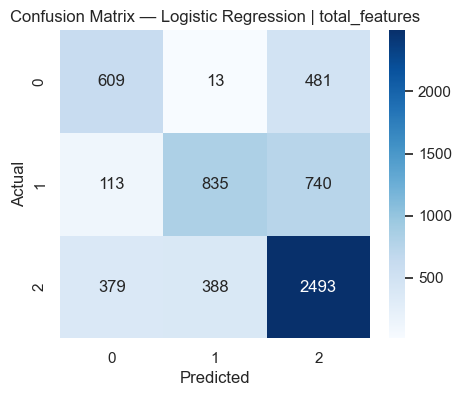

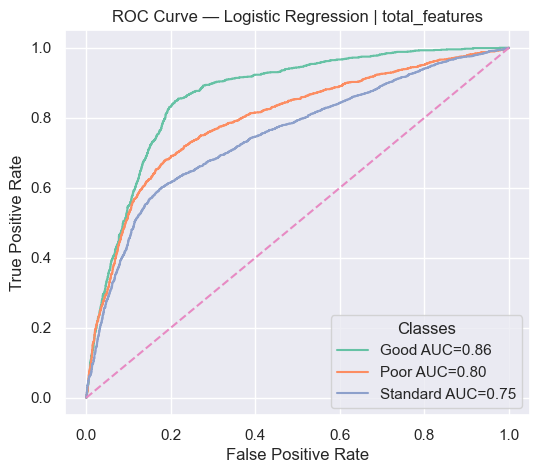


--- Training Random Forest ---
Accuracy: 0.7759
F1 Score: 0.7603
📦 Saved model as: Model_02.pkl


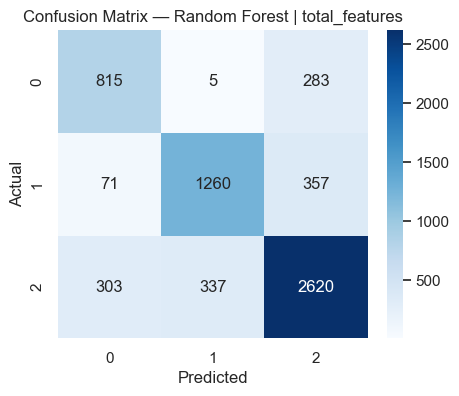

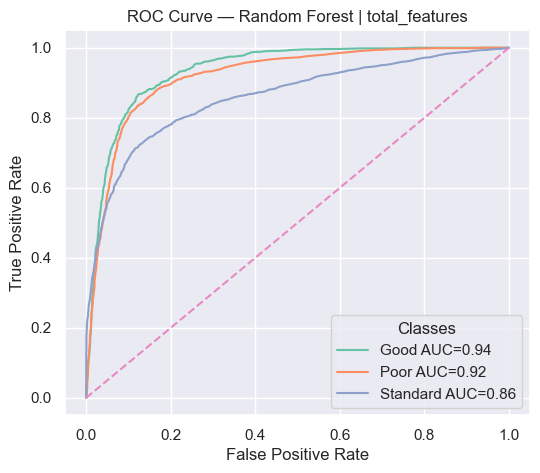


--- Training Gradient Boosting ---
Accuracy: 0.7110
F1 Score: 0.6890
📦 Saved model as: Model_03.pkl


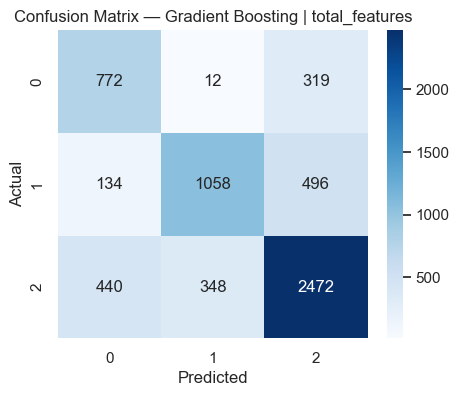

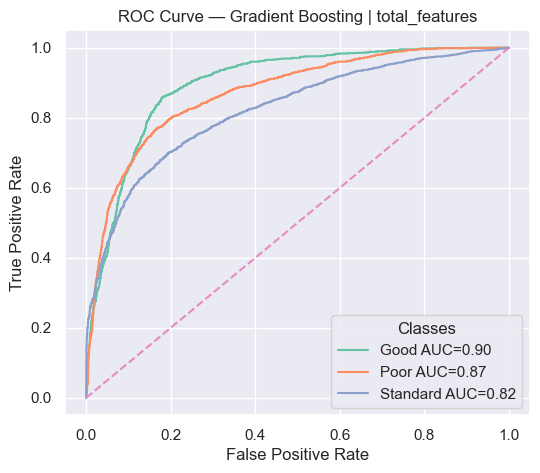


--- Training LightGBM ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2345
[LightGBM] [Info] Number of data points in the train set: 24201, number of used features: 49
[LightGBM] [Info] Start training from score -1.702066
[LightGBM] [Info] Start training from score -1.276851
[LightGBM] [Info] Start training from score -0.618449
Accuracy: 0.7376
F1 Score: 0.7192
📦 Saved model as: Model_04.pkl


/Users/joboy/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


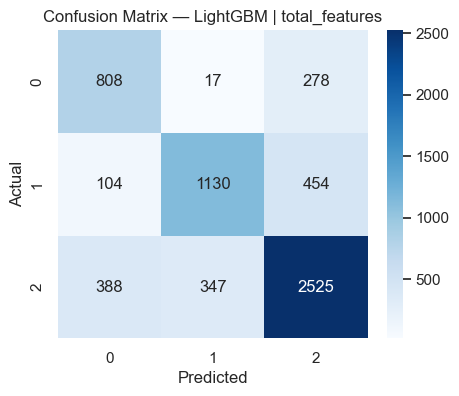

/Users/joboy/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


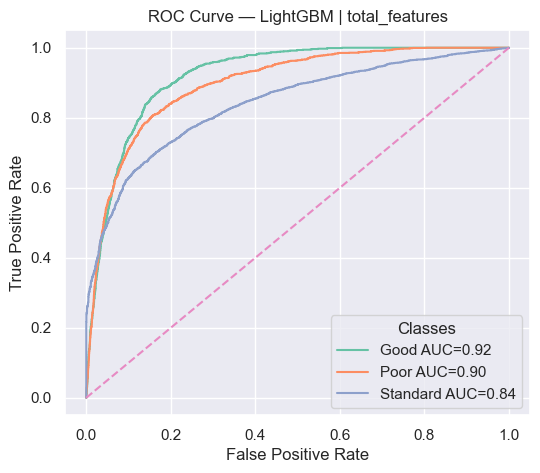


🔎 Feature Set: top_features_simple

--- Training Logistic Regression ---


/Users/joboy/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6424
F1 Score: 0.6020
📦 Saved model as: Model_05.pkl


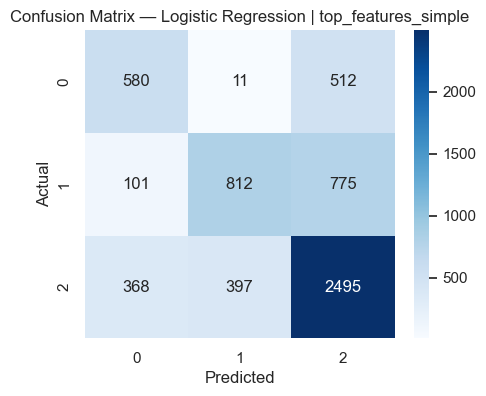

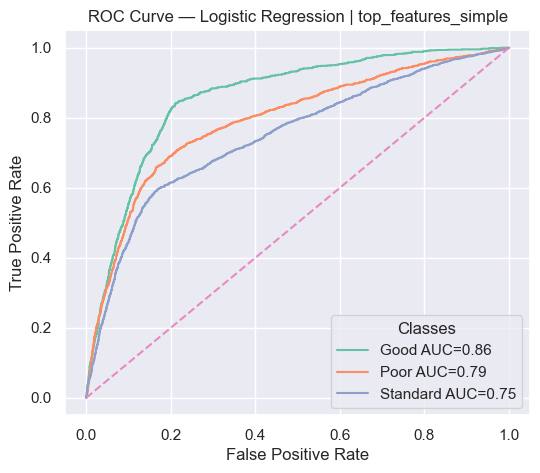


--- Training Random Forest ---
Accuracy: 0.7729
F1 Score: 0.7579
📦 Saved model as: Model_06.pkl


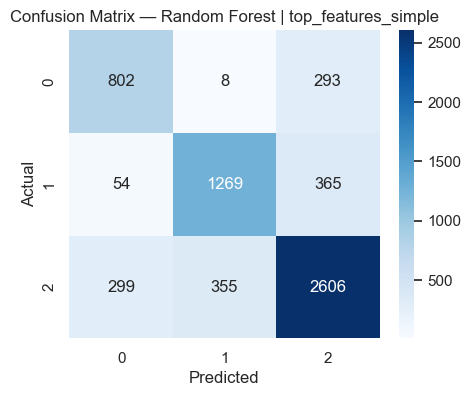

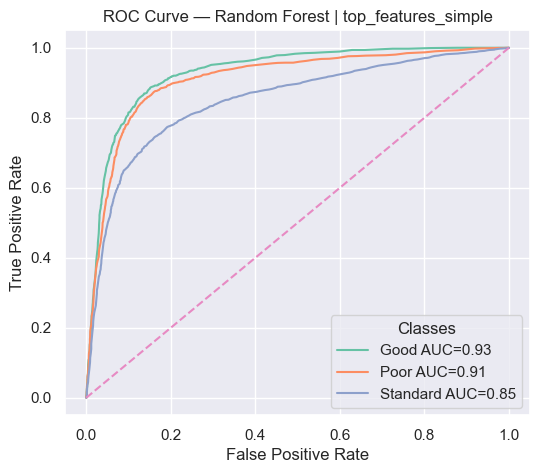


--- Training Gradient Boosting ---
Accuracy: 0.7075
F1 Score: 0.6849
📦 Saved model as: Model_07.pkl


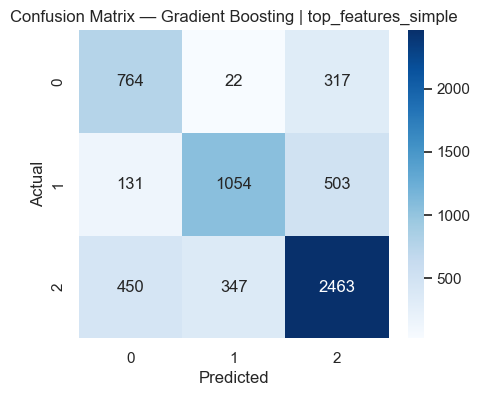

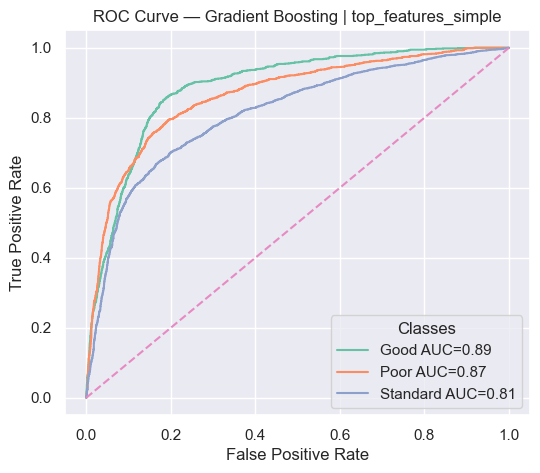


--- Training LightGBM ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2204
[LightGBM] [Info] Number of data points in the train set: 24201, number of used features: 14
[LightGBM] [Info] Start training from score -1.702066
[LightGBM] [Info] Start training from score -1.276851
[LightGBM] [Info] Start training from score -0.618449
Accuracy: 0.7301
F1 Score: 0.7102
📦 Saved model as: Model_08.pkl


/Users/joboy/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


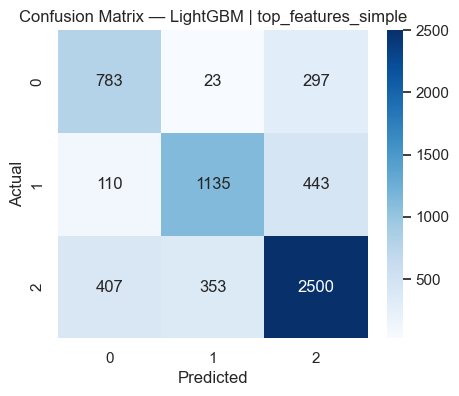

/Users/joboy/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


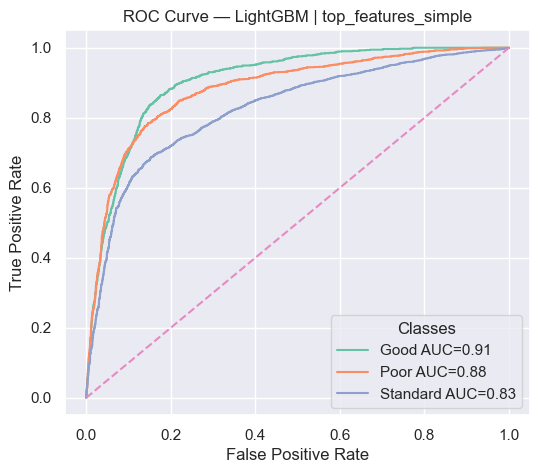


🔎 Feature Set: selected_features_mixed

--- Training Logistic Regression ---


/Users/joboy/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6511
F1 Score: 0.6133
📦 Saved model as: Model_09.pkl


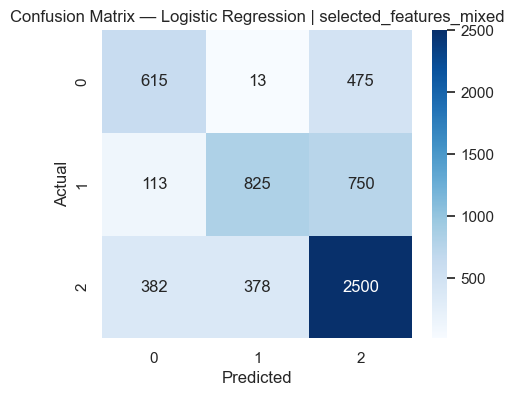

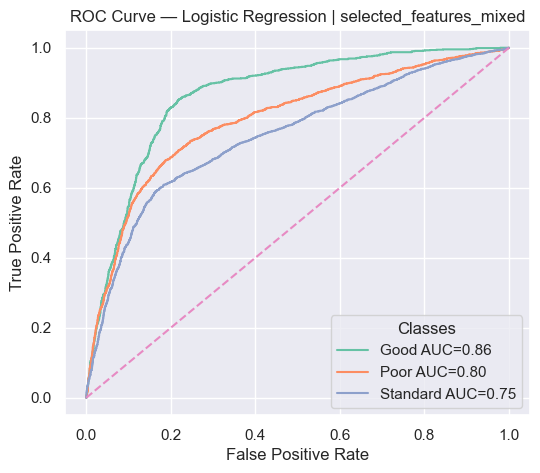


--- Training Random Forest ---
Accuracy: 0.7736
F1 Score: 0.7580
📦 Saved model as: Model_10.pkl


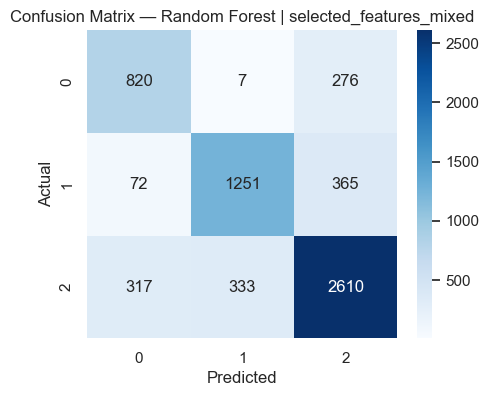

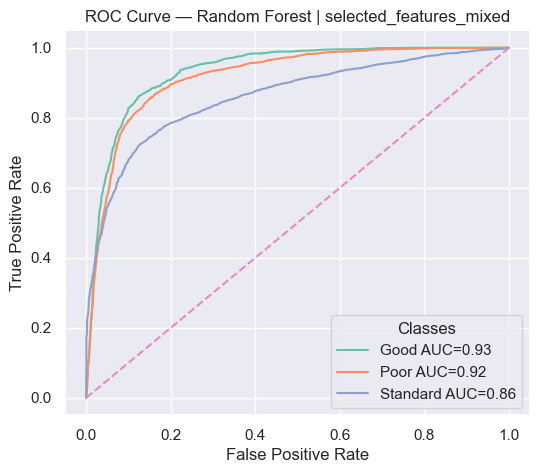


--- Training Gradient Boosting ---
Accuracy: 0.7101
F1 Score: 0.6885
📦 Saved model as: Model_11.pkl


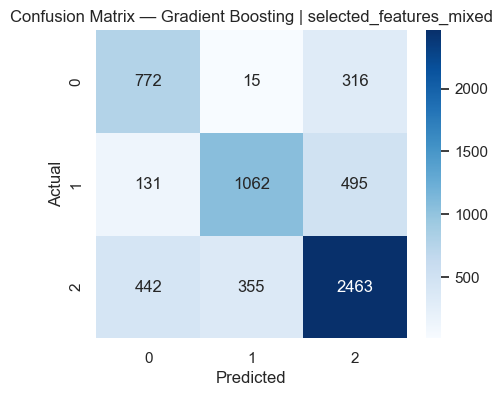

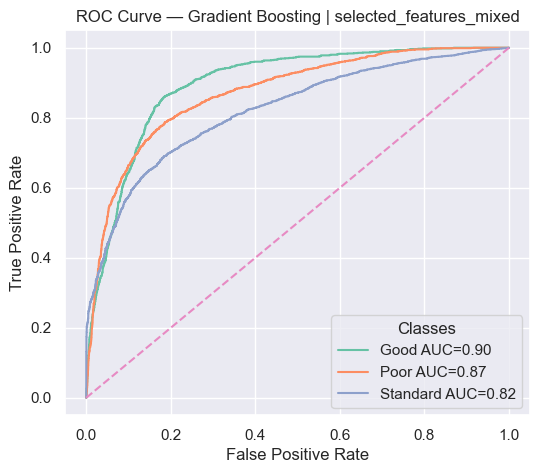


--- Training LightGBM ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2335
[LightGBM] [Info] Number of data points in the train set: 24201, number of used features: 44
[LightGBM] [Info] Start training from score -1.702066
[LightGBM] [Info] Start training from score -1.276851
[LightGBM] [Info] Start training from score -0.618449
Accuracy: 0.7348
F1 Score: 0.7161
📦 Saved model as: Model_12.pkl


/Users/joboy/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


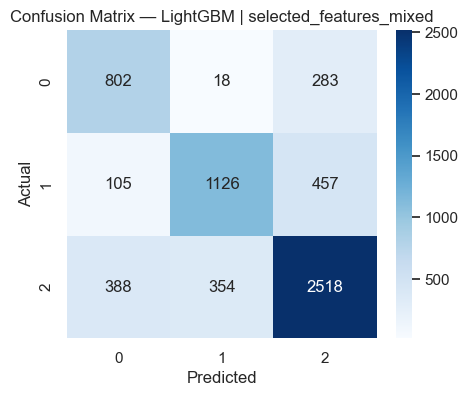

/Users/joboy/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


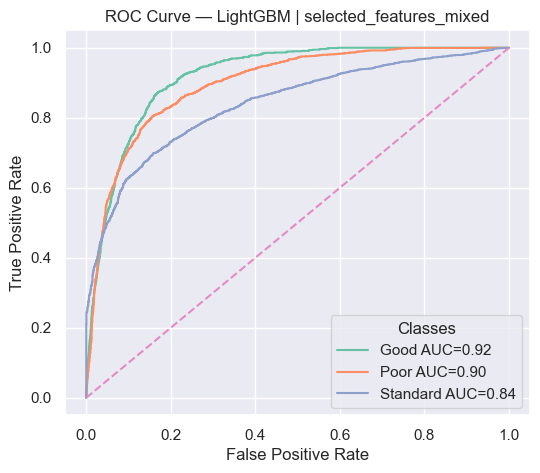


🔎 Feature Set: top20_features_mixed

--- Training Logistic Regression ---


/Users/joboy/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6424
F1 Score: 0.6021
📦 Saved model as: Model_13.pkl


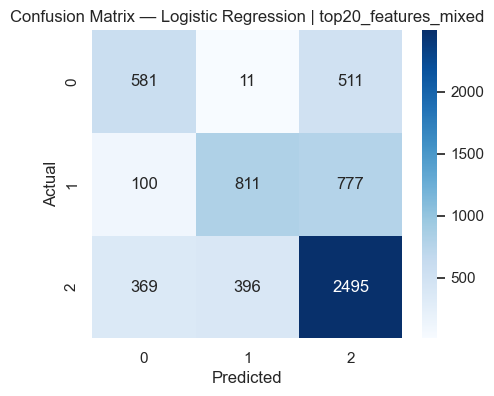

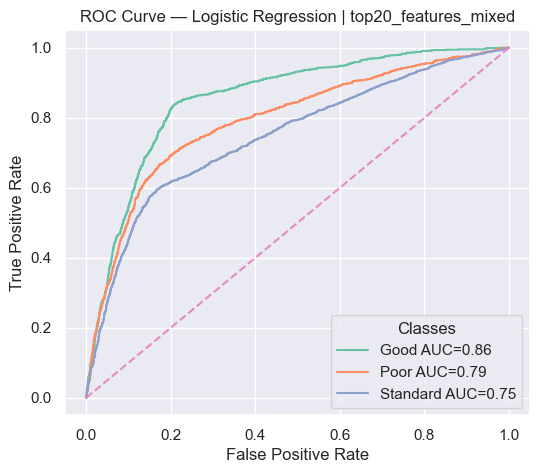


--- Training Random Forest ---
Accuracy: 0.7536
F1 Score: 0.7339
📦 Saved model as: Model_14.pkl


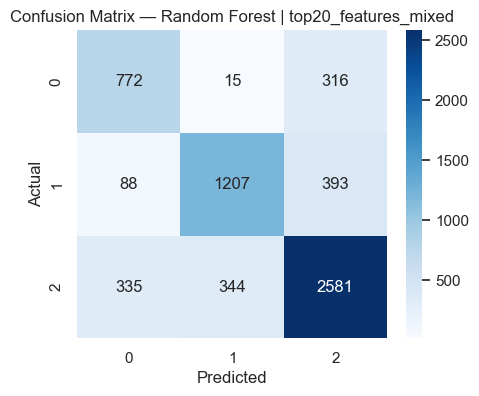

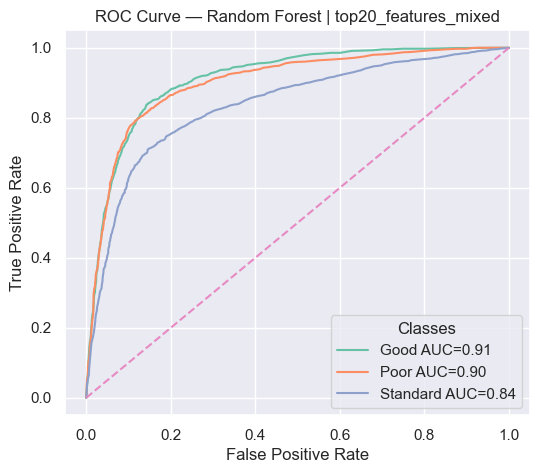


--- Training Gradient Boosting ---
Accuracy: 0.7085
F1 Score: 0.6858
📦 Saved model as: Model_15.pkl


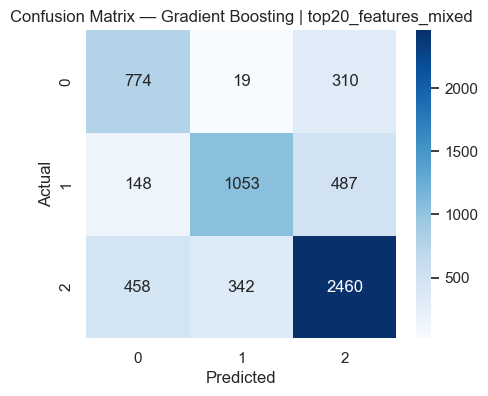

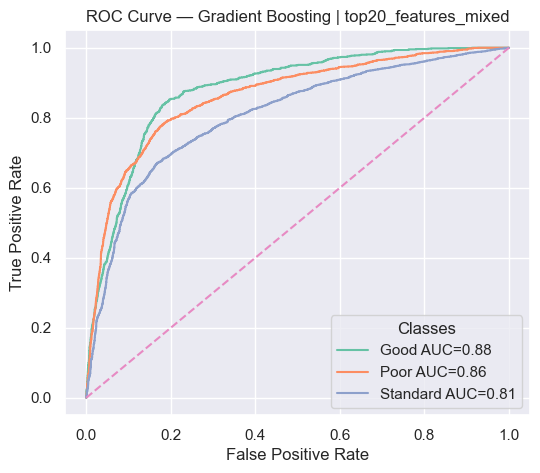


--- Training LightGBM ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1439
[LightGBM] [Info] Number of data points in the train set: 24201, number of used features: 11
[LightGBM] [Info] Start training from score -1.702066
[LightGBM] [Info] Start training from score -1.276851
[LightGBM] [Info] Start training from score -0.618449
Accuracy: 0.7215
F1 Score: 0.7005
📦 Saved model as: Model_16.pkl


/Users/joboy/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


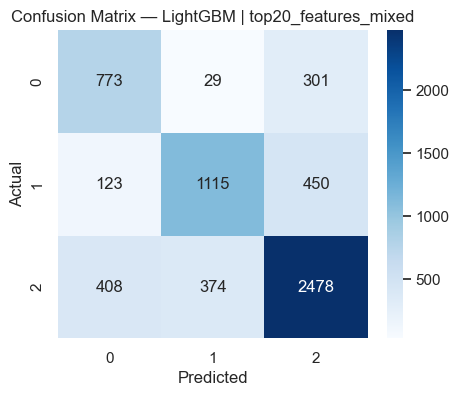

/Users/joboy/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


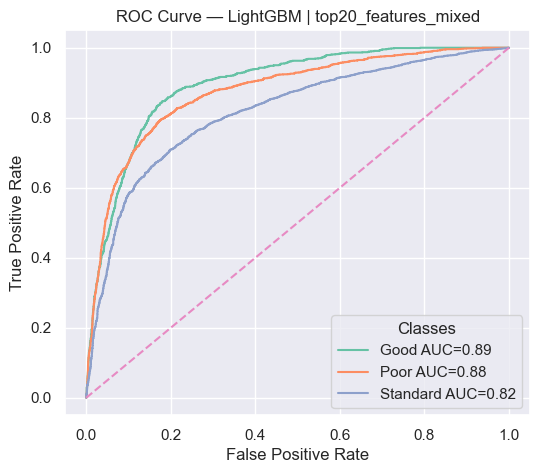


🎯 ALL 16 MODELS TRAINED & SAVED SUCCESSFULLY!


In [146]:
print("\n=== Running Models for All Feature Sets ===\n")

results_all = {}
model_counter = 1  # Track model number 1–16

for set_name, (Xtr, Xte, Ytr, Yte) in feature_splits.items():

    print(f"\n==============================")
    print(f"🔎 Feature Set: {set_name}")
    print("==============================")

    classes = sorted(Ytr.unique())
    Yte_bin = label_binarize(Yte, classes=classes)

    for model_name, model in models.items():
        print(f"\n--- Training {model_name} ---")

        try:
            # Dynamically build a preprocessor for this feature set
            numeric = [c for c in numeric_cols if c in Xtr.columns]
            ordinal = [c for c in ordinal_features if c in Xtr.columns]
            onehot  = [c for c in onehot_features if c in Xtr.columns]
            binary  = [c for c in binary_loan_features if c in Xtr.columns]

            preprocessor = ColumnTransformer(
                transformers=[
                    ("num", numeric_transformer, numeric),
                    ("ordinal", ordinal_transformer, ordinal),
                    ("onehot", onehot_transformer, onehot),
                    ("binary", "passthrough", binary),
                ],
                remainder="drop"
            )

            clf = Pipeline(steps=[
                ("preprocess", preprocessor),
                ("model", model)
            ])

            # Train model
            clf.fit(Xtr, Ytr)

            # Predictions & Metrics
            y_pred = clf.predict(Xte)
            acc = accuracy_score(Yte, y_pred)
            f1 = f1_score(Yte, y_pred, average="macro")

            print(f"Accuracy: {acc:.4f}")
            print(f"F1 Score: {f1:.4f}")

            if set_name not in results_all:
                results_all[set_name] = {}

            results_all[set_name][model_name] = {"Accuracy": acc, "F1 Score": f1}

            # ➕ SAVE MODEL
            save_path = f"Model_{model_counter:02d}.pkl"
            with open(save_path, "wb") as f:
                pickle.dump(clf, f)

            print(f"📦 Saved model as: {save_path}")
            model_counter += 1

            # Confusion Matrix
            cm = confusion_matrix(Yte, y_pred)
            plt.figure(figsize=(5, 4))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
            plt.title(f"Confusion Matrix — {model_name} | {set_name}")
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.show()

            # ROC Curve if supported
            if hasattr(clf.named_steps["model"], "predict_proba"):
                y_proba = clf.predict_proba(Xte)

                plt.figure(figsize=(6, 5))
                for i, cls in enumerate(classes):
                    fpr, tpr, _ = roc_curve(Yte_bin[:, i], y_proba[:, i])
                    roc_auc = auc(fpr, tpr)
                    plt.plot(fpr, tpr, label=f"{cls} AUC={roc_auc:.2f}")

                plt.plot([0, 1], [0, 1], linestyle="--")
                plt.title(f"ROC Curve — {model_name} | {set_name}")
                plt.xlabel("False Positive Rate")
                plt.ylabel("True Positive Rate")
                plt.legend(title="Classes")
                plt.show()

        except Exception as e:
            print(f"❌ Error training {model_name}: {e}")

print("\n🎯 ALL 16 MODELS TRAINED & SAVED SUCCESSFULLY!")

In [144]:
# ------------------------------------------------------------
# 5️⃣ Display Full Multi-Feature-Set Results
# ------------------------------------------------------------

if "results_all" not in globals() or len(results_all) == 0:
    print("⚠️ No results found. Please run model training first.")
else:
    # Convert nested dict → MultiIndex DataFrame
    results_panel = pd.concat(
        {fs: pd.DataFrame(m).T for fs, m in results_all.items()},
        axis=0
    )

    print("\n=== MODEL PERFORMANCE SUMMARY ACROSS ALL FEATURE SETS ===")
    display(results_panel)

    # ------------------------------------------------------------
    # 6️⃣ Show Ranking of Best Model per Feature Set
    # ------------------------------------------------------------
    print("\n=== BEST PERFORMER PER FEATURE SET (Ranked by F1 Score) ===")

    best_per_feature = results_panel.groupby(level=0).apply(
        lambda g: g.sort_values(by="F1 Score", ascending=False).head(1)
    )

    display(best_per_feature)


=== MODEL PERFORMANCE SUMMARY ACROSS ALL FEATURE SETS ===


Accuracy  F1 Score
total_features          Logistic Regression  0.650636  0.612903
                        Random Forest        0.775905  0.760269
                        Gradient Boosting    0.710957  0.688960
                        LightGBM             0.737564  0.719211
top_features_simple     Logistic Regression  0.642373  0.602033
                        Random Forest        0.772930  0.757906
                        Gradient Boosting    0.707486  0.684881
                        LightGBM             0.730127  0.710171
selected_features_mixed Logistic Regression  0.651132  0.613269
                        Random Forest        0.773591  0.758033
                        Gradient Boosting    0.710131  0.688464
                        LightGBM             0.734755  0.716121
top20_features_mixed    Logistic Regression  0.642373  0.602124
                        Random Forest        0.753594  0.733945
                        Gradient Boosting    0.708478  0.685768
                        LightGBM             0.721534  0.700539


=== BEST PERFORMER PER FEATURE SET (Ranked by F1 Score) ===


,,,Accuracy,F1 Score
selected_features_mixed,selected_features_mixed,Random Forest,0.773591,0.758033
top20_features_mixed,top20_features_mixed,Random Forest,0.753594,0.733945
top_features_simple,top_features_simple,Random Forest,0.772930,0.757906
total_features,total_features,Random Forest,0.775905,0.760269


Based on the model evaluation results across four different feature-engineering configurations, the Random Forest classifier consistently produced the strongest performance, achieving the highest F1 Scores and demonstrating robust generalization across all feature sets. The ROC curve analysis further supports this conclusion: Random Forest models achieved higher and more stable AUC values for each credit score class compared to the other algorithms, indicating stronger separability between risk categories. This confirms that Random Forest is well-suited for capturing the nonlinear relationships and feature interactions present in the credit scoring dataset. With the best-performing model identified for each feature subset, the next step is to validate these final candidates on the held-out test data one more time. This final evaluation ensures that the selected Random Forest models not only performed well during development but also maintain accuracy and reliability when exposed to entirely unseen samples, confirming their readiness for real-world prediction scenarios.


## Section 6 - Discussion + Conclusion

The objective of this project was to build a supervised machine learning model capable of accurately classifying individuals into credit score categories. To accomplish this, we trained and evaluated four different algorithms — **Logistic Regression**, **Gradient Boosting**, **LightGBM**, and **Random Forest** — across four engineered feature configurations. Performance was evaluated using **Accuracy** and **F1 Score**, with F1 Score being emphasized due to class imbalance.

Across all experiments, **Random Forest consistently delivered the strongest performance**, as shown in the results below:

| Feature Set | Best Model | Accuracy | F1 Score |
|------------|------------|----------|---------|
| total_features | Random Forest | **0.7759** | **0.7603** |
| top_features_simple | Random Forest | **0.7729** | **0.7579** |
| selected_features_mixed | Random Forest | **0.7736** | **0.7580** |
| top20_features_mixed | Random Forest | **0.7536** | **0.7339** |

These results show that ensemble tree-based algorithms perform particularly well on mixed numeric-categorical financial datasets. Feature engineering played an important role in improving classification, although removing too many features reduced predictive performance in some configurations. This demonstrates the importance of **data-driven feature selection** rather than relying solely on human intuition.

Additionally, we learned that:
- **Dynamic preprocessing pipelines** are needed when using different feature subsets.
- Performance gains came from **iterative refinement** of both features and models.
- Using more than one metric is crucial — accuracy alone would have been misleading.

###  Future Work

There are several opportunities to expand and improve this project:

- Apply **hyperparameter tuning** to maximize Random Forest performance  
- Build **stacked or voting ensembles** for additional predictive lift  
- Use **explainability tools** (such as SHAP values) to improve fairness and transparency  
- Validate performance on **new, real-world data** to ensure long-term stability  


We have identified **four high-performing Random Forest models**, one for each feature set. These models have now been **fully retrained** on the complete training data. The next step is to **evaluate them on the unseen test dataset** to confirm generalization ability before selecting the final production-ready model.

One important observation during testing is that the **test dataset contains 10 distinct months**, while the **training dataset includes only 8 months**. This mismatch means that the model encounters previously unseen month categories during prediction. Because our preprocessing pipeline uses `OneHotEncoder(handle_unknown="ignore")`, the model can safely handle these new months without failure. However, this reinforces the need to **monitor model drift** and ensure updated training data is incorporated over time — particularly if seasonal financial behavior impacts credit risk.

Overall, this pipeline and experimentation strategy provides a strong foundation for developing a real-world credit scoring system that supports responsible and data-driven lending decisions, even in the presence of evolving input patterns such as new temporal categories.